In [1]:
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for removing punctuations 
import string

# for scaling
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data_cleaned.csv')

In [3]:
df.head()

company_name   location  \
0         Procter & Gamble     Mumbai   
1               S&P Global    Gurgaon   
2  Oracuz Infotech Pvt Ltd     Remote   
3                    Optum  Bengaluru   
4                 ITI Data    Chennai   

                                           job_title  \
0  Senior Manager – SAP Security Governance: Risk...   
1                          Apprentice – Data Analyst   
2                                Data Science Intern   
3                             Manager Data Scientist   
4                             AWS Glue Data Engineer   

                                     job_description  rating  \
0  The Senior Manager’s role will ensure that the...     4.1   
1  We are responsible for assuring that data impa...     4.1   
2  You will be assigned with module projects and ...     NaN   
3  As an Associate Manager, you will play a criti...     NaN   
4  Require Financial Services industry experience...     4.2   

   employer_estimate  min_salary  max_salary  avg_salary  \
0                  0      400000      700000    550000.0   
1                  0      500000      700000    600000.0   
2                  1        5000        5000      5000.0   
3                  0     1000000     1000000   1000000.0   
4                  0      200000      900000    550000.0   

                   Size Founded               Type  \
0      10000+ Employees    1837   Company - Public   
1      10000+ Employees    1860   Company - Public   
2                   NaN     NaN                NaN   
3                   NaN     NaN                NaN   
4  201 to 500 Employees    1999  Company - Private   

                                  Industry                     Sector  \
0           Consumer Product Manufacturing              Manufacturing   
1                 Research and development  Management and consulting   
2                                      NaN                        NaN   
3                                      NaN                        NaN   
4  Information Technology Support Services     Information Technology   

                    Revenue  \
0        $10+ billion (USD)   
1        $10+ billion (USD)   
2                       NaN   
3                       NaN   
4  Unknown / Non-Applicable   

                                              skills    age  
0        SAP, SOX, Analysis skills, SAP S/4HANA, RMF  187.0  
1   Business intelligence, Relational databases, ...  164.0  
2    Web development, Machine learning, Data science    NaN  
3   TensorFlow, Big data, SQL, Analysis skills, M...    NaN  
4                 Oracle, XML, Spark, NoSQL, MongoDB   25.0

In [4]:
df.duplicated().sum()

0

In [5]:
df.columns

Index(['company_name', 'location', 'job_title', 'job_description', 'rating',
       'employer_estimate', 'min_salary', 'max_salary', 'avg_salary', 'Size',
       'Founded', 'Type', 'Industry', 'Sector', 'Revenue', 'skills', 'age'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company_name       374 non-null    object 
 1   location           374 non-null    object 
 2   job_title          374 non-null    object 
 3   job_description    374 non-null    object 
 4   rating             321 non-null    float64
 5   employer_estimate  374 non-null    int64  
 6   min_salary         374 non-null    int64  
 7   max_salary         374 non-null    int64  
 8   avg_salary         374 non-null    float64
 9   Size               323 non-null    object 
 10  Founded            323 non-null    object 
 11  Type               323 non-null    object 
 12  Industry           323 non-null    object 
 13  Sector             323 non-null    object 
 14  Revenue            323 non-null    object 
 15  skills             373 non-null    object 
 16  age                268 non

### Things we can do 
### still left analysis are marked

- Explore various job_titles and how they affect the salary column
- how location affects salary 
- how the age of the company does that
- `what are the skills needed for different profiles - on a bird eye view what skills correspond to which profile`
- `what skills are required for higher salaried positions`
- does the size of the company affect the salary
- maximum jobs are available in which location 
- do higher rated companies pay well 
- `does employer estimate affect salary any how - like if the employer estimate is better salary than glassdoor estimate`
- which industry and sector offer the most jobs - try combining these two cols if they are similar - no they are having different categories !
- what is the max salary offered in our dataset 
- look into the distributions and barplots of numeric and categorical columns respectively 
- word cloud of different skills 
- word cloud of different `job descriptions`

### `1) Explore various job_titles and how they affect the salary column`

In [7]:
df['job_title'].value_counts()

Data Science Intern                                                   14
Data Analyst                                                          14
Data Scientist                                                        12
Data Engineer                                                          6
Data Analyst, Predictive, India- X Delivery                            6
                                                                      ..
Senior Knowledge Analyst - Healthcare Ops                              1
Software Development Engineer II                                       1
Applications Developer (Independent Contractor)—Bhubaneswar, India     1
Engineer III - Software Engineering (IN)                               1
2025 Bangalore Software Engineering Internship                         1
Name: job_title, Length: 186, dtype: int64

In [8]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
# create vocabulary of all unique words in the job title to see which ones are the main common ones to affect salary
#df['job_title'].replace(',','',inplace = True)

In [10]:
def remove_punctuations(st):
    import string
    puns = string.punctuation
    for i in puns :
        if i in st :
            #print(i, st) # debugging
            st = st.replace(i,'')
    return st
df['job_title'] = df['job_title'].apply(remove_punctuations)

In [11]:
df.job_title

0      Senior Manager – SAP Security Governance Risk ...
1                              Apprentice – Data Analyst
2                                    Data Science Intern
3                                 Manager Data Scientist
4                                 AWS Glue Data Engineer
                             ...                        
369       2025 Bangalore Software Engineering Internship
370                                       Data Scientist
371                                  Data Science Intern
372                                  Data Science Intern
373                                         Data Analyst
Name: job_title, Length: 374, dtype: object

In [12]:
counts_series = df.job_title.str.lower().value_counts().sort_index()
print(len(counts_series))
for i in range(len(counts_series)):
    print(counts_series.index[i])

183
2025 bangalore software engineering internship
administrator iii  system  applications administration
ai engineer india  bcg x
ai prompt engineer  junior
ai research intern
aiml intern
aladdin financial engineering data scientist associate
analyst advanced analytics and data scienceindia
analyst geo analytics india  x delivery
analyst iii  it solutions
analystdata analytics
analystdata science
analytics  data analyst
android developer
applications developer independent contractor—bhubaneswar india
apprentice data science
apprentice – data analyst
architect i  software engineering
associate  data operations
associate  data science ml
associate data analytics
associate data analytics  freshers
associate data science
associate data scientist
associate data scientists
associate software engineer
associate software engineer net full stack
aws glue data engineer
aws glueeks data engineer
bsa operations senior analyst
climate data analyst
cloud engineering
coders  ai training freelance re

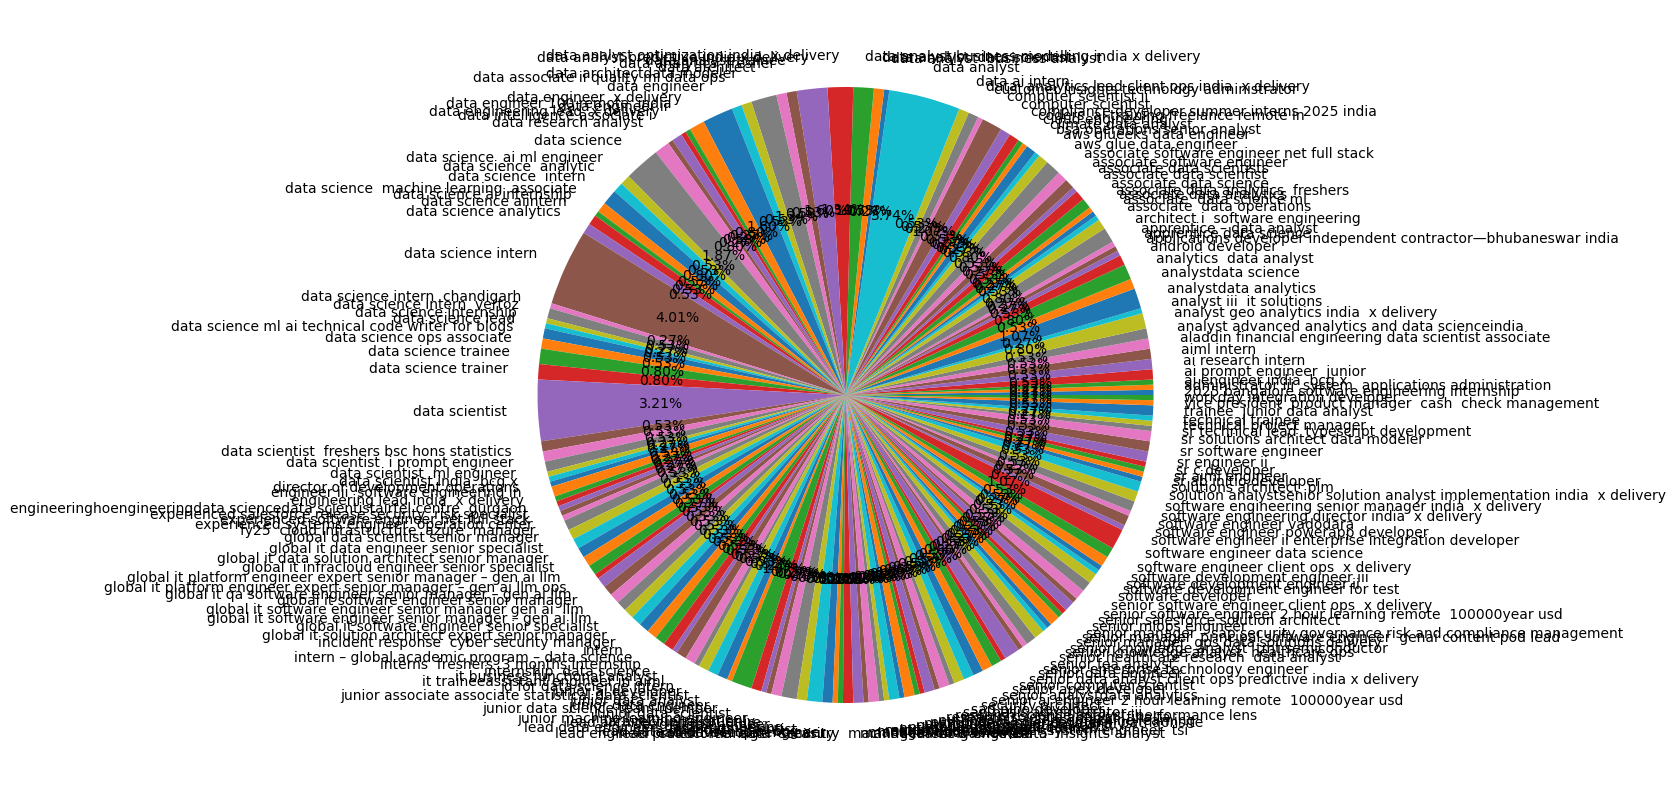

In [13]:
# a piechart for various job roles
plt.figure(figsize = (20,10))
plt.pie(counts_series, autopct = "%1.2f%%",labels = counts_series.index)
plt.show()

`above is a very messy list of so many (183 to be specific) different job titles out of which we need to select the important keywords to actually understand the trend of most frequent or important job titles`

### 1.1 seniority would become our ordinal variable

In [14]:
# separate Senior-junior tags
df['seniority'] = np.nan
# df['junior'] = np.nan # creating 2 cols representing the same thing i.e. seniorityity just adds on dimensionality

def seniority_tags(text,idx):
    text = text.lower()
    if 'sr' in text or 'senior'in text or 'lead' in text or 'manager'in text or 'director' in text or 'president'in text :
        df['seniority'][idx] = 2
    elif 'jr' in text or 'junior' in text or 'fresher' in text or 'freshers' in text or 'apprentice' in text or 'trainee' in text or 'intern' in text or 'assistant' in text:
        df['seniority'][idx] = 0
    else :
        df['seniority'][idx] = 1
    
for idx, i in enumerate(df['job_title']):
    seniority_tags(i, idx)                

In [15]:
df.seniority.value_counts()

1.0    195
2.0     99
0.0     80
Name: seniority, dtype: int64

In [16]:
df.isnull().sum() # age has 106 while founded has 51 null values since there were values like '-' in founded col

company_name           0
location               0
job_title              0
job_description        0
rating                53
employer_estimate      0
min_salary             0
max_salary             0
avg_salary             0
Size                  51
Founded               51
Type                  51
Industry              51
Sector                51
Revenue               51
skills                 1
age                  106
seniority              0
dtype: int64

In [17]:
# df.seniority.fillna(0,inplace = True) # not doing this since nan also represents a category instead we can fill nan with 2 if required

In [18]:
# let's pick the keywords from each job title 

df.job_title = df.job_title.str.lower()

In [19]:
# helper code to understand key words to create simplified job titles

lst = []
for i in range(len(df)):
    lst.append(np.array(df.job_title[i].split()))

vocabulary = [word for sublist in lst for word in sublist]

freq_map = {}
for i in range(len(vocabulary)):
    if(vocabulary[i] not in freq_map):
        freq_map[vocabulary[i]] = 1
    else :
        freq_map[vocabulary[i]] += 1
        
sorted(freq_map.items(), key = lambda x : x[1], reverse = True)

[('data', 227),
 ('engineer', 96),
 ('science', 74),
 ('analyst', 73),
 ('senior', 55),
 ('scientist', 46),
 ('software', 46),
 ('x', 45),
 ('delivery', 42),
 ('india', 40),
 ('intern', 34),
 ('manager', 31),
 ('associate', 27),
 ('ai', 25),
 ('global', 25),
 ('it', 25),
 ('lead', 24),
 ('analytics', 22),
 ('developer', 21),
 ('architect', 19),
 ('engineering', 19),
 ('junior', 18),
 ('ops', 16),
 ('–', 13),
 ('learning', 12),
 ('ii', 11),
 ('trainee', 10),
 ('sr', 10),
 ('research', 10),
 ('predictive', 9),
 ('gen', 9),
 ('llm', 9),
 ('client', 9),
 ('ml', 9),
 ('solution', 9),
 ('analystdata', 8),
 ('security', 7),
 ('computer', 7),
 ('internship', 7),
 ('specialist', 7),
 ('remote', 6),
 ('development', 6),
 ('machine', 6),
 ('python', 6),
 ('expert', 6),
 ('solutions', 6),
 ('i', 6),
 ('iii', 6),
 ('business', 6),
 ('aws', 5),
 ('bcg', 5),
 ('aiml', 5),
 ('trainer', 5),
 ('optimization', 5),
 ('freshers', 5),
 ('for', 5),
 ('technical', 5),
 ('stack', 5),
 ('sap', 4),
 ('and', 4),


cloud , mlops, python, sap , ai, machine learning or ml , data analyst, gen ai, llm, developer, manager, intern, scientist, engineer, data 

### 1.2 Creating simplified job titles

In [20]:
def title_simplifier(title):
    if 'manager' in title and 'data scientist' in title:
        return 'manager data scientist'
    elif 'data scientist' in title or 'data science' in title or 'datascientist' in title or 'datascience' in title or 'scientists' in title:
        return 'data scientist'
    elif 'data engineer' in title or 'dataengineer' in title:
        return 'data engineer'
    elif 'analyst' in title or 'analytics' in title or 'analystdata' in title or 'analyser' in title or 'analytic' in title:
        return 'analyst'
    elif 'machine learning' in title or 'ml' in title:
        return 'machine learning engineer'
    elif 'nlp' in title or 'llm' in title or 'genai' in title or 'gen' in title or 'gen ai' in title:
        return 'nlp engineer'
    elif 'manager' in title:
        return 'manager'
    elif 'director' in title:
        return 'director'
    elif 'intern' in title or 'internship' in title or 'trainee' in title or 'training' in title:
        return 'intern'
    elif 'mlops' in title:
        return 'mlops engineer'
    elif 'architect' in title or 'architectdata' in title:
        return 'data architect'
    elif 'python' in title:
        return 'python automation'
    elif 'software' in title or 'software developer' in title or 'developer' in title:
        return 'software developer'
    elif ' ai' in title or 'ai ' in title:
        return 'ai engineer'
    elif 'research' in title:
        return 'research engineer'
    elif 'prompt' in title :
        return 'prompt engineer'
    elif 'cloud' in title or 'gps' in title or 'azure' in title:
        return 'cloud related'
    elif 'data' in title :
        return 'data related'
    else:
        return 'other'
    

In [21]:
for i in df.job_title:
    if ' ai' in i or 'ai ' in i:
        print(i)

ai engineer india  bcg x
coders  ai training freelance remote in
sr aiml engineer
data science ai internship
global it qa software engineer senior manager – gen ai llm
ai prompt engineer  junior
ai prompt engineer  junior
global it software engineer senior manager – gen ai llm
global it platform engineer expert senior manager – gen ai llm
global it platform engineer expert senior manager – gen ai llm ops
it traineeassistant engineer in aiml
global it software engineer senior manager – gen ai llm
global it platform engineer expert senior manager – gen ai llm
global it platform engineer expert senior manager – gen ai llm ops
it traineeassistant engineer in aiml
data science  ai ml engineer
data science aiintern
ai research intern
data ai intern
data science  ai ml engineer
global it software engineer senior manager gen ai  llm
data science ml ai technical code writer for blogs
data science aiintern
ai research intern
data ai intern
global it software engineer senior manager gen ai  llm
s

In [22]:
df['job_simp'] = df['job_title'].apply(title_simplifier)

In [23]:
df.loc[0:6,['job_title','job_simp']]

job_title                job_simp
0  senior manager – sap security governance risk ...                 manager
1                          apprentice – data analyst                 analyst
2                                data science intern          data scientist
3                             manager data scientist  manager data scientist
4                             aws glue data engineer           data engineer
5                          senior computer scientist                   other
6                         software engineer vadodara      software developer

### Now we can do : `Explore various job_titles and how they affect the salary column`

In [24]:
df.job_simp.value_counts()

data scientist               115
analyst                       81
software developer            39
data engineer                 28
other                         21
manager                       17
data architect                17
intern                        13
machine learning engineer     13
nlp engineer                  12
ai engineer                    5
manager data scientist         3
director                       3
cloud related                  3
data related                   3
python automation              1
Name: job_simp, dtype: int64

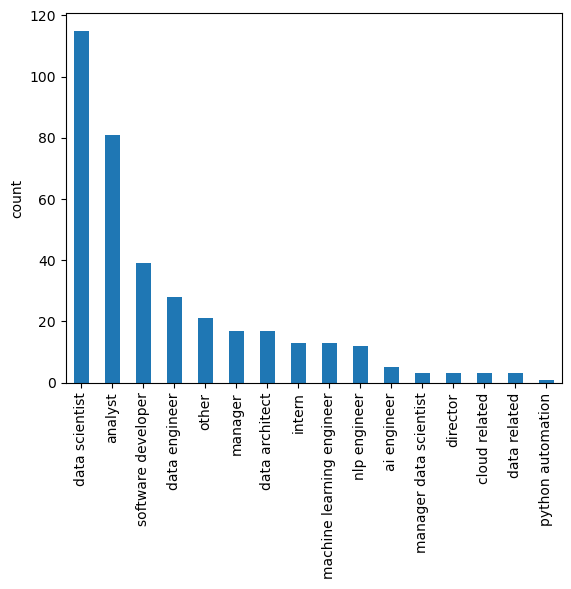

In [25]:
df.job_simp.value_counts().plot(kind = 'bar')
plt.ylabel('count')
plt.show()

### `1.3 max salary offered in our dataset`

In [26]:
df.avg_salary.max()

3250000.0

In [27]:
df[df.avg_salary == df.avg_salary.max()]

company_name location              job_title  \
23        Adobe    Noida  computer scientist ii   

                                      job_description  rating  \
23  If you are applying for a role outside of your...     4.2   

    employer_estimate  min_salary  max_salary  avg_salary              Size  \
23                  1     2500000     4000000   3250000.0  10000+ Employees   

   Founded              Type                       Industry  \
23    1982  Company - Public  Computer Hardware Development   

                    Sector                 Revenue  \
23  Information Technology  $2 to $5 billion (USD)   

                                               skills   age  seniority  \
23   Azure, Data structures, Adobe Creative Suite,...  42.0        1.0   

   job_simp  
23    other

### `1.4 Let's calculate the avg salary by new job profiles`

In [28]:
avg_salaries_by_profile = df.groupby(['job_simp']).mean()['avg_salary']

In [29]:
# formatting the salaries represents them as strings
avg_salaries_by_profile.sort_values(ascending = False).apply(lambda x: "{:,.0f}".format(x))

job_simp
director                     1,200,000
manager data scientist         600,000
data related                   433,333
machine learning engineer      411,538
ai engineer                    370,000
other                          349,285
data scientist                 324,660
analyst                        271,932
software developer             253,269
intern                         239,230
data engineer                  234,999
nlp engineer                   226,166
cloud related                  216,666
data architect                 188,970
manager                        151,205
python automation                   -1
Name: avg_salary, dtype: object

Text(0, 0.5, 'salaries in lakh')

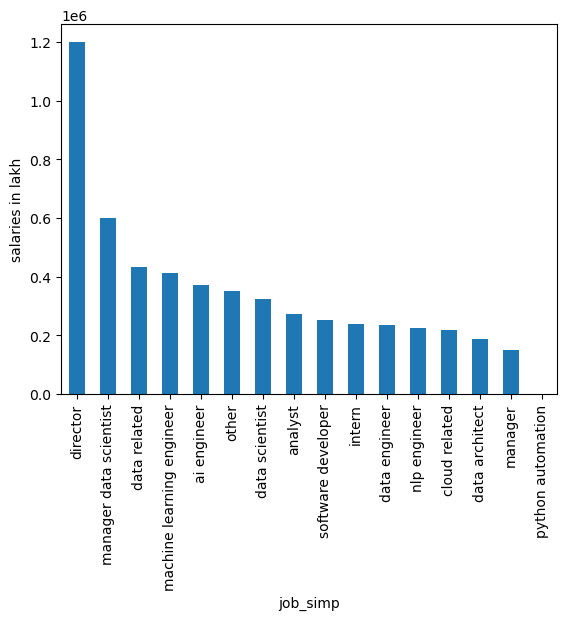

In [30]:
salaries = avg_salaries_by_profile.sort_values(ascending = False)#.apply(lambda x: astype(int(x)))
salaries.plot(kind = 'bar')
plt.ylabel('salaries in lakh')

In [31]:
df.groupby('job_simp').mean()['avg_salary'].reset_index() # this is exactly same as avg_salaries_by_profile without reset_index

job_simp    avg_salary
0                 ai engineer  3.699996e+05
1                     analyst  2.719315e+05
2               cloud related  2.166660e+05
3              data architect  1.889700e+05
4               data engineer  2.349995e+05
5                data related  4.333327e+05
6              data scientist  3.246604e+05
7                    director  1.200000e+06
8                      intern  2.392302e+05
9   machine learning engineer  4.115380e+05
10                    manager  1.512052e+05
11     manager data scientist  5.999997e+05
12               nlp engineer  2.261661e+05
13                      other  3.492850e+05
14          python automation -1.000000e+00
15         software developer  2.532686e+05

In [32]:
df.groupby(['job_simp','seniority']).mean().reset_index()

job_simp  seniority    rating  employer_estimate  \
0                 ai engineer        0.0  3.800000           0.000000   
1                 ai engineer        1.0  4.200000           0.000000   
2                 ai engineer        2.0  4.000000           0.000000   
3                     analyst        0.0  3.916667           0.000000   
4                     analyst        1.0  4.091489           0.056604   
5                     analyst        2.0  4.075000           0.062500   
6               cloud related        1.0  3.600000           0.000000   
7               cloud related        2.0  4.200000           0.000000   
8              data architect        1.0  3.900000           0.076923   
9              data architect        2.0  3.850000           0.000000   
10              data engineer        0.0  3.800000           0.000000   
11              data engineer        1.0  4.113333           0.062500   
12              data engineer        2.0  3.955556           0.100000   
13               data related        1.0  3.600000           0.500000   
14               data related        2.0  3.600000           0.000000   
15             data scientist        0.0  3.903125           0.111111   
16             data scientist        1.0  3.981818           0.031250   
17             data scientist        2.0  4.033333           0.000000   
18                   director        2.0  4.200000           0.333333   
19                     intern        0.0  3.462500           0.000000   
20                     intern        1.0       NaN           1.000000   
21  machine learning engineer        0.0  3.800000           0.000000   
22  machine learning engineer        1.0  3.950000           0.000000   
23  machine learning engineer        2.0  4.100000           0.000000   
24                    manager        2.0  4.126667           0.117647   
25     manager data scientist        2.0  4.200000           0.000000   
26               nlp engineer        1.0  4.100000           0.000000   
27               nlp engineer        2.0  4.160000           0.181818   
28                      other        1.0  3.963636           0.166667   
29                      other        2.0  3.933333           0.111111   
30          python automation        1.0  4.200000           0.000000   
31         software developer        0.0  3.900000           0.000000   
32         software developer        1.0  3.854545           0.115385   
33         software developer        2.0  4.040000           0.000000   

       min_salary    max_salary    avg_salary         age  
0   199999.500000  3.999995e+05  2.999995e+05    4.000000  
1   600000.000000  9.000000e+05  7.500000e+05   61.000000  
2   149999.500000  3.499995e+05  2.499995e+05   10.000000  
3   283332.916667  4.499996e+05  3.666662e+05   35.333333  
4   179206.962264  3.180183e+05  2.486126e+05   71.681818  
5   187499.375000  3.687494e+05  2.781244e+05   66.437500  
6       -1.000000 -1.000000e+00 -1.000000e+00   51.000000  
7   299999.500000  3.499995e+05  3.249995e+05   61.000000  
8   114999.461538  2.946148e+05  2.048072e+05   64.500000  
9    74999.250000  1.999992e+05  1.374992e+05  112.000000  
10   99999.500000  2.999995e+05  1.999995e+05   35.000000  
11  200624.500000  3.756245e+05  2.881245e+05   83.600000  
12  121999.400000  1.919994e+05  1.569994e+05   64.222222  
13  299999.500000  9.999995e+05  6.499995e+05         NaN  
14      -1.000000 -1.000000e+00 -1.000000e+00    1.000000  
15  264666.266667  4.271329e+05  3.458996e+05   86.642857  
16  230890.140625  3.869370e+05  3.089136e+05   67.378378  
17  233332.833333  4.333328e+05  3.333328e+05  116.000000  
18  933333.000000  1.466666e+06  1.200000e+06   61.000000  
19  208332.750000  3.083328e+05  2.583328e+05  120.333333  
20   10000.000000  1.000000e+04  1.000000e+04         NaN  
21  333332.833333  3.833328e+05  3.583328e+05   35.000000  
22  249999.500000  3.749995e+05  3.124995e+05   36.000000  
23  633333.000000  6.6666

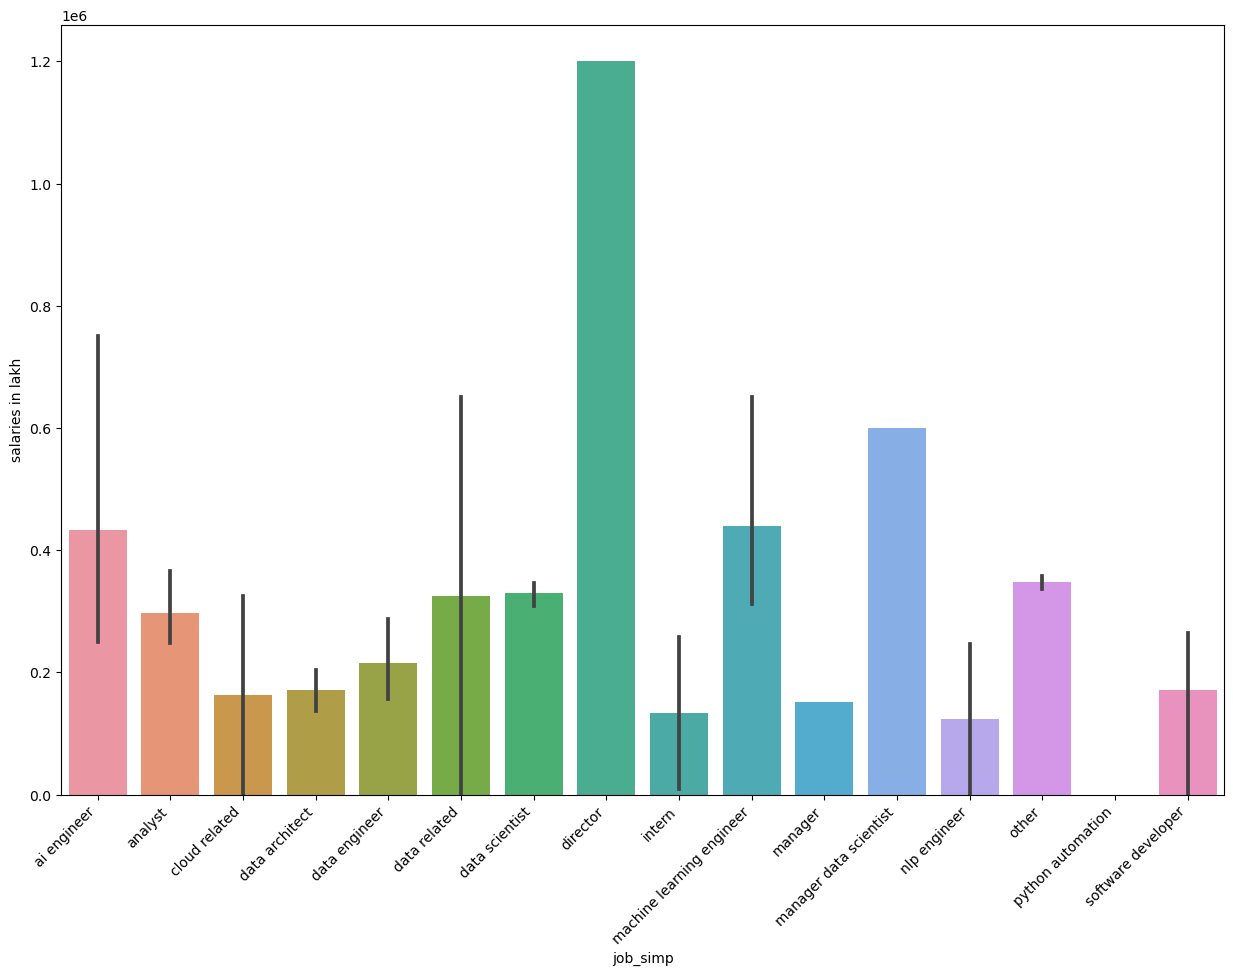

In [33]:
# in the below 2 graphs the python automation and data related job titles dont have the salary values 
# but one of them is shown and the other not because of the seniority tag being associated with the one shown in the graph
plt.figure(figsize = (15,10))
sns.barplot(data = df.groupby(['job_simp','seniority']).mean().reset_index(), x = 'job_simp', y = 'avg_salary')
plt.ylabel('salaries in lakh')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

From the plot, we understand that job titles with wider CIs have more salary variation, and narrower CIs indicate more stable salary ranges within those categories.

Wider CI: It suggests that the range of possible values for the true average salary is broader, reflecting higher variability in the data or a smaller sample size. While it shows more uncertainty, it still maintains the same level of confidence (e.g., 95%) that the true mean lies within that interval.

Narrower CI: Indicates less variability and a more precise estimate of the average salary, suggesting that the values are clustered closer around the mean.

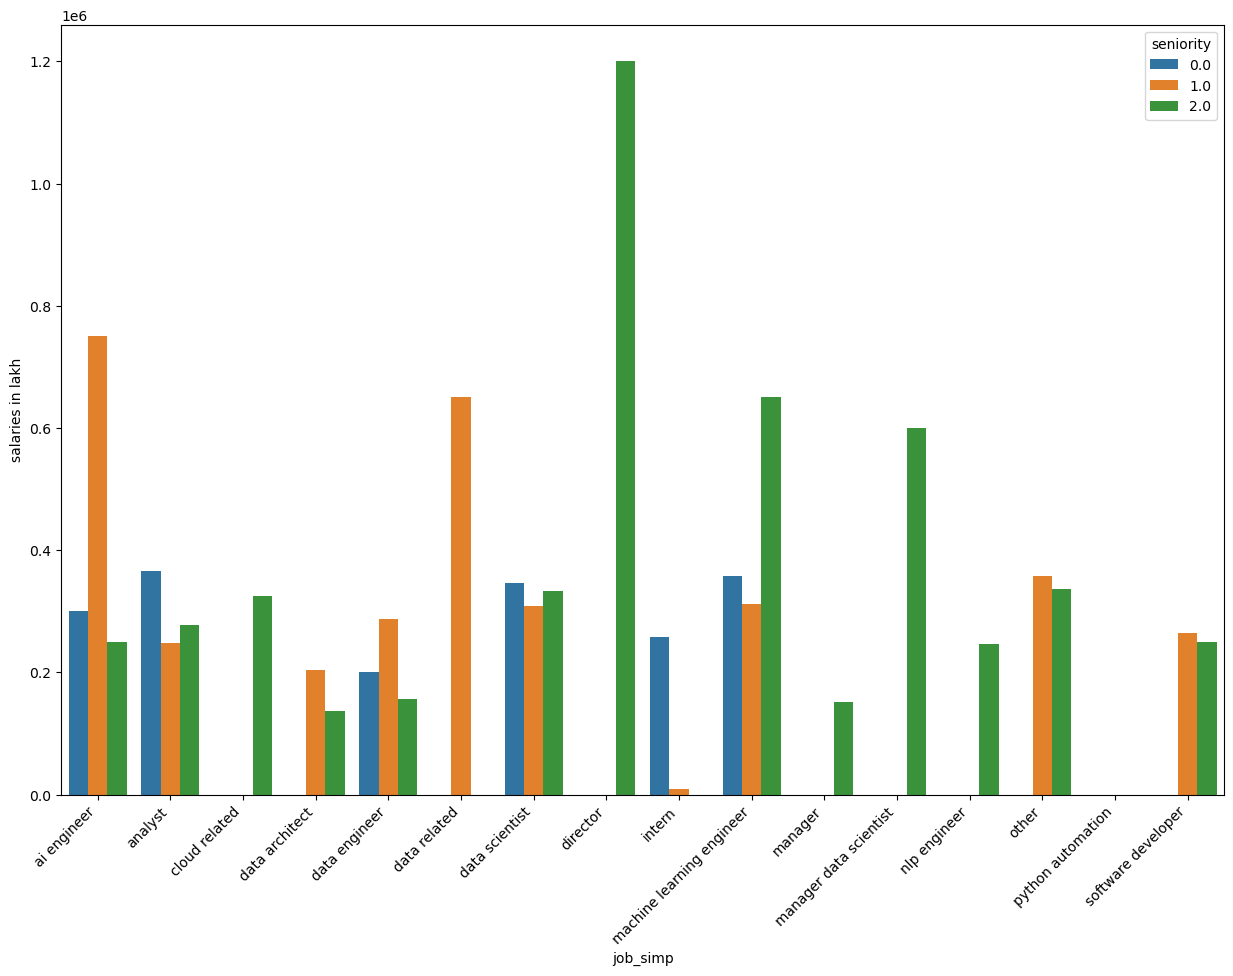

In [34]:
plt.figure(figsize = (15,10))
sns.barplot(data = df.groupby(['job_simp','seniority']).mean().reset_index(), x = 'job_simp', y = 'avg_salary', hue = 'seniority')
plt.ylabel('salaries in lakh')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [35]:
# from the above barplot we can see that there is a huge difference in the salary of director from other professions
# and it is astonishing that the manager has the lowest salaryamong others .. 

In [36]:
df.loc[:50,['job_title','job_simp','skills']][df.job_simp == 'other']

job_title job_simp  \
5   senior computer scientist    other   
23      computer scientist ii    other   

                                               skills  
5    TensorFlow, Image processing, Azure, Kubernet...  
23   Azure, Data structures, Adobe Creative Suite,...

In [37]:
df.loc[:,['job_title','job_simp','skills','seniority','avg_salary']][df.job_simp == 'data related']

job_title      job_simp  \
149                 associate  data operations  data related   
221                 associate  data operations  data related   
263  lead engineer  salesforce  data  security  data related   

                                                skills  seniority  avg_salary  
149   Databases, SQL, Machine learning, Communicati...        1.0        -1.0  
221   Databases, SQL, Machine learning, Communicati...        1.0   1300000.0  
263   Customer service, Salesforce, Data structures...        2.0        -1.0

In [38]:
df.groupby(['seniority'])['avg_salary'].mean().reset_index()

seniority     avg_salary
0        0.0  327693.300000
1        1.0  280548.164103
2        2.0  286762.050505

### 1.5 Seniority wise avg salary 
from the graph below it is clear that it is the natural trend in our data that the avg salary of junior level is coming out to be more than senior and mid level . Astonishing !

In [39]:
df.groupby(['seniority']).max().reset_index()

seniority                            company_name       location  \
0        0.0  Wisdom college for creativity & design       Vadodara   
1        1.0                 myOnsite Healthcare LLC       Vadodara   
2        2.0                              objectways  Visakhapatnam   

                                           job_title  \
0                       trainee  junior data analyst   
1                      workday integration developer   
2  vice president  product manager  cash  check m...   

                                     job_description  rating  \
0  we are hiring Data Science Interns , qualifica...     5.0   
1  · Stay up to date on latest technology and lev...     5.0   
2  ➢ Participate in an on-call rotation to addres...     4.2   

   employer_estimate  min_salary  max_salary  avg_salary    age  \
0                  1     1000000     1000000   1000000.0  334.0   
1                  1     2500000     4000000   3250000.0  225.0   
2                  1     2500000     3600000   3050000.0  297.0   

             job_simp  
0  software developer  
1  software developer  
2  software developer

In [40]:
df.avg_salary[df.seniority == 0].mean()

327693.3

In [41]:
df.avg_salary[df.seniority == 1].mean()

280548.1641025641

In [42]:
df.avg_salary[df.seniority == 2].mean()

286762.0505050505

In [43]:
df.groupby(['seniority']).mean()['avg_salary'].reset_index()

seniority     avg_salary
0        0.0  327693.300000
1        1.0  280548.164103
2        2.0  286762.050505

<AxesSubplot:xlabel='seniority', ylabel='avg_salary'>

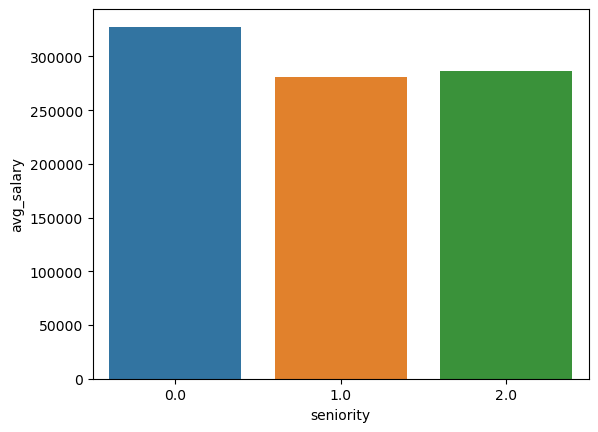

In [44]:
avg_salary_seniority_wise = df.groupby(['seniority'])['avg_salary'].mean().reset_index()
sns.barplot(data = avg_salary_seniority_wise, x = 'seniority', y = 'avg_salary')

In [45]:
# to see which level has the most frequency - mid level
df.seniority.value_counts()

1.0    195
2.0     99
0.0     80
Name: seniority, dtype: int64

In [46]:
df.seniority.value_counts().index

Float64Index([1.0, 2.0, 0.0], dtype='float64')

## `2) maximum jobs are available in which location in our data`

In [47]:
df.location.value_counts() 

Bengaluru             96
Gurgaon               69
Pune                  42
Delhi                 41
Noida                 27
India                 20
Remote                17
Hyderābād             10
Chennai                9
Mumbai                 8
Cochin                 4
Vadodara               4
Salem                  4
Chandigarh             3
Calcutta               3
Ahmedabad              3
Thiruvananthapuram     2
Maharashtra            2
Amritsar               2
Visakhapatnam          2
Haryāna                1
Ghaziabad              1
Rājkot                 1
Coimbatore             1
Bhubaneshwar           1
Tamil Nadu             1
Name: location, dtype: int64

### `2.1 how location affects salary`

In [48]:
df.groupby('location')['avg_salary'].mean().sort_values(ascending = False).reset_index()

location      avg_salary
0              Haryāna  1000000.000000
1          Maharashtra   474999.500000
2               Remote   389117.294118
3                Noida   383332.777778
4               Mumbai   370937.125000
5             Vadodara   362499.500000
6                India   329624.550000
7              Gurgaon   319738.623188
8               Cochin   299999.500000
9                Delhi   297670.195122
10           Bengaluru   281770.302083
11             Chennai   278055.111111
12               Salem   274999.500000
13            Amritsar   274999.500000
14  Thiruvananthapuram   249999.500000
15       Visakhapatnam   249999.500000
16          Chandigarh   234999.666667
17                Pune   202380.261905
18           Ahmedabad   199999.333333
19           Hyderābād   149999.200000
20            Calcutta   133332.666667
21           Ghaziabad    13000.000000
22              Rājkot       -1.000000
23          Coimbatore       -1.000000
24          Tamil Nadu       -1.000000
25        Bhubaneshwar       -1.000000

##### We see that only a single record for job in haryana is present and it makes it bag the highest salary offering state according to our data !

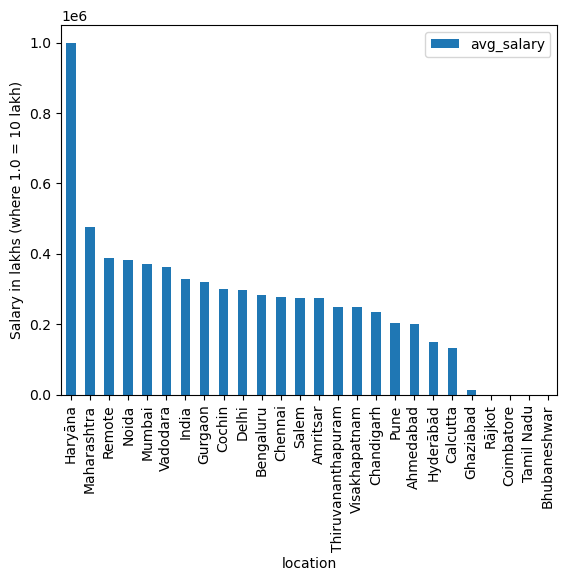

In [49]:
df.groupby('location')['avg_salary'].mean().sort_values(ascending = False).reset_index().plot(kind = 'bar', x = 'location')
plt.ylabel('Salary in lakhs (where 1.0 = 10 lakh)')
plt.show()


Yes, the sort_values() method behaves slightly differently when used on a Series compared to a DataFrame. Here are the key differences:

1. Usage on a Series:
Syntax: Series.sort_values(ascending=True, inplace=False, na_position='last')
Function: Sorts the values of the Series.
Key Parameters:
ascending: Boolean value that determines the sort order (True for ascending, False for descending).
inplace: If True, the sorting is done in place, modifying the Series; otherwise, it returns a new sorted Series.
na_position: Specifies the position of NaNs; 'last' (default) places NaNs at the end, 'first' places them at the beginning.
Example:
python
Copy code
series = pd.Series([3, 1, 2])
sorted_series = series.sort_values(ascending=False)
2. Usage on a DataFrame:
Syntax: DataFrame.sort_values(by, ascending=True, inplace=False, na_position='last')
Function: Sorts the DataFrame based on one or more columns.
Key Parameters:
by: Column name(s) to sort by (required).
ascending: Sort order, can be a single boolean or a list of booleans if sorting by multiple columns.
inplace: If True, the sorting modifies the DataFrame in place; otherwise, it returns a new sorted DataFrame.
na_position: Specifies the position of NaNs ('last' or 'first').
Example:
python
Copy code
df = pd.DataFrame({'A': [3, 1, 2], 'B': [1, 2, 3]})
sorted_df = df.sort_values(by='A', ascending=False)
Key Differences:
Parameter Requirement: In a Series, you do not specify a column because a Series is a single column of data. In a DataFrame, you must specify the column(s) to sort by using the by parameter.
Sorting Scope: Sorting a Series affects only its values, while sorting a DataFrame can involve multiple columns and their relationships.
These differences are mainly due to the structural distinction between a Series (single column) and a DataFrame (multi-column).

## `3) Correlation between diff columns` 

In [50]:
df.corr()

rating  employer_estimate  min_salary  max_salary  \
rating             1.000000           0.093805    0.027368    0.017980   
employer_estimate  0.093805           1.000000    0.167759    0.180795   
min_salary         0.027368           0.167759    1.000000    0.914714   
max_salary         0.017980           0.180795    0.914714    1.000000   
avg_salary         0.022167           0.179304    0.968708    0.986390   
age                0.115871           0.000342    0.032788    0.012837   
seniority          0.188271           0.024383   -0.036890   -0.027811   

                   avg_salary       age  seniority  
rating               0.022167  0.115871   0.188271  
employer_estimate    0.179304  0.000342   0.024383  
min_salary           0.968708  0.032788  -0.036890  
max_salary           0.986390  0.012837  -0.027811  
avg_salary           1.000000  0.021174  -0.032091  
age                  0.021174  1.000000   0.037562  
seniority           -0.032091  0.037562   1.000000

### this is really an anomalous observation that the avg salary is negatively correlated to seniority level !
That means as seniority increases , salary decreases !

## `4) Distributions of various columns and their correlations with the salary column`

In [51]:
# to choose the type of scaling method for our columns to see the heatmap clearly , we can try finding the distributions ofvarious columns of the dataset
df.columns

Index(['company_name', 'location', 'job_title', 'job_description', 'rating',
       'employer_estimate', 'min_salary', 'max_salary', 'avg_salary', 'Size',
       'Founded', 'Type', 'Industry', 'Sector', 'Revenue', 'skills', 'age',
       'seniority', 'job_simp'],
      dtype='object')

In [52]:
df.shape

(374, 19)

<AxesSubplot:>

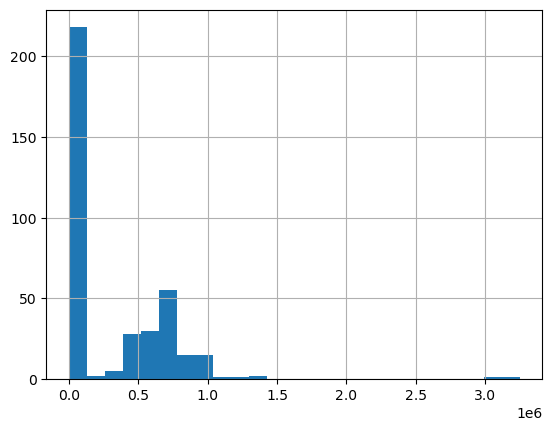

In [53]:
df['avg_salary'].hist(bins = 25)

<AxesSubplot:xlabel='avg_salary', ylabel='Density'>

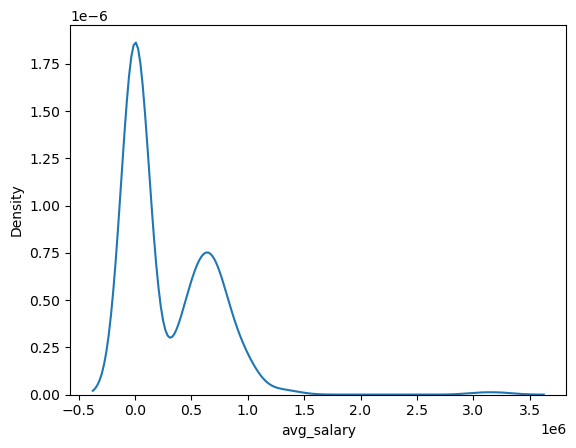

In [54]:
sns.kdeplot(df['avg_salary'])

In [55]:
df.select_dtypes('number').columns

Index(['rating', 'employer_estimate', 'min_salary', 'max_salary', 'avg_salary',
       'age', 'seniority'],
      dtype='object')

You're right! Histograms and KDE plots work on different scales by default:

The histogram shows the count (or frequency) of data points in each bin by default, which depends on the size of the dataset.
The KDE (Kernel Density Estimate) is a smoothed probability density function. It normalizes the data, so the area under the curve sums to 1.

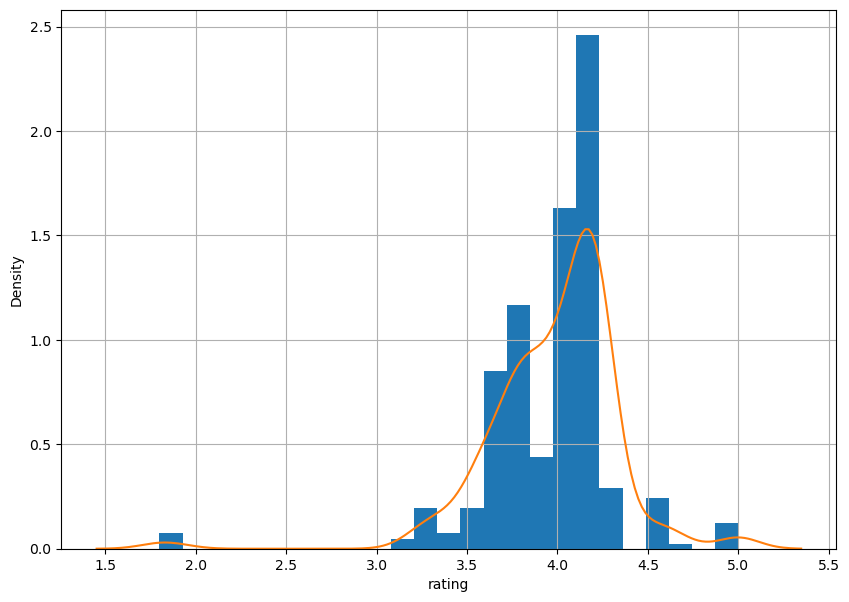

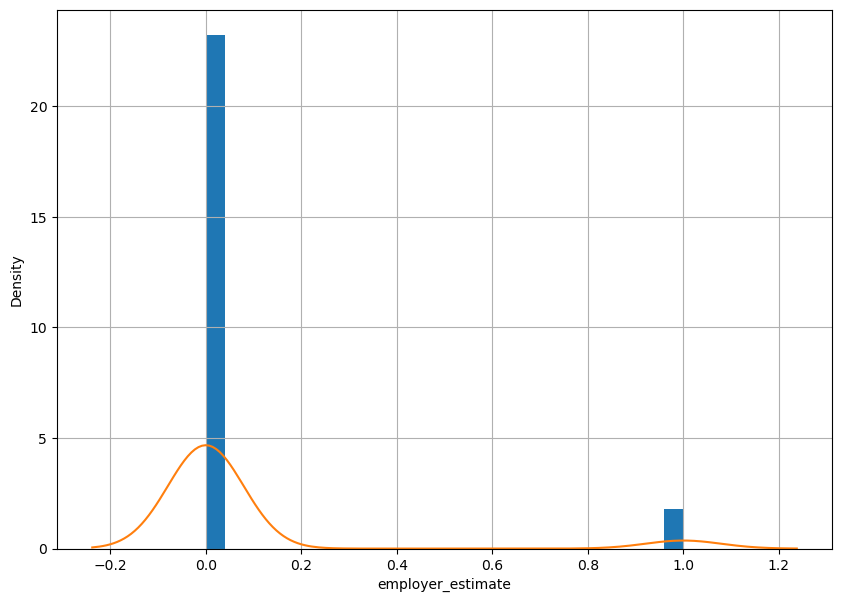

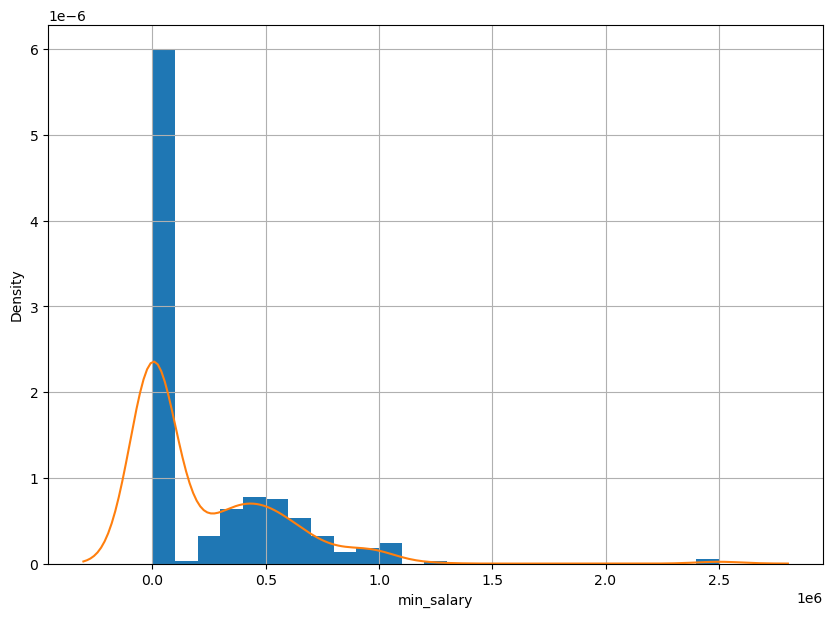

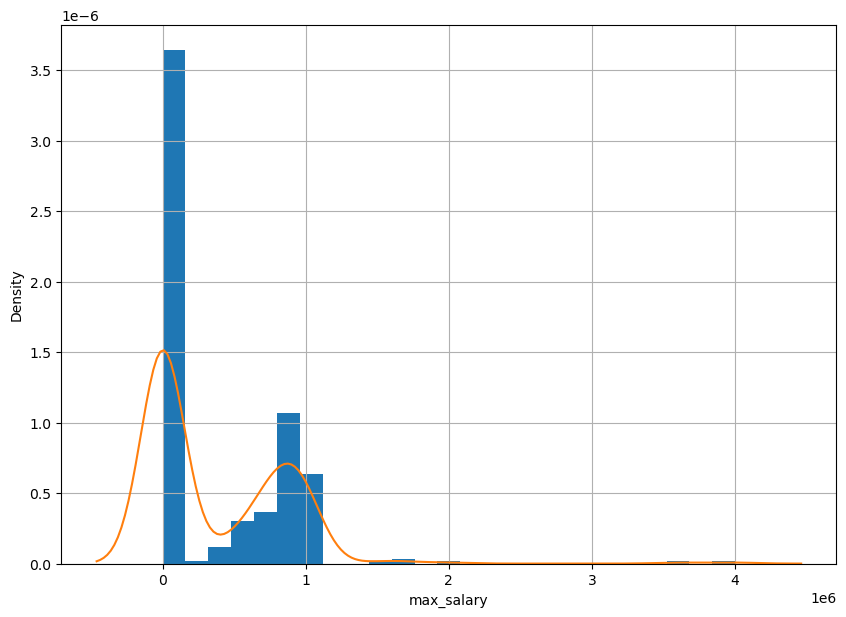

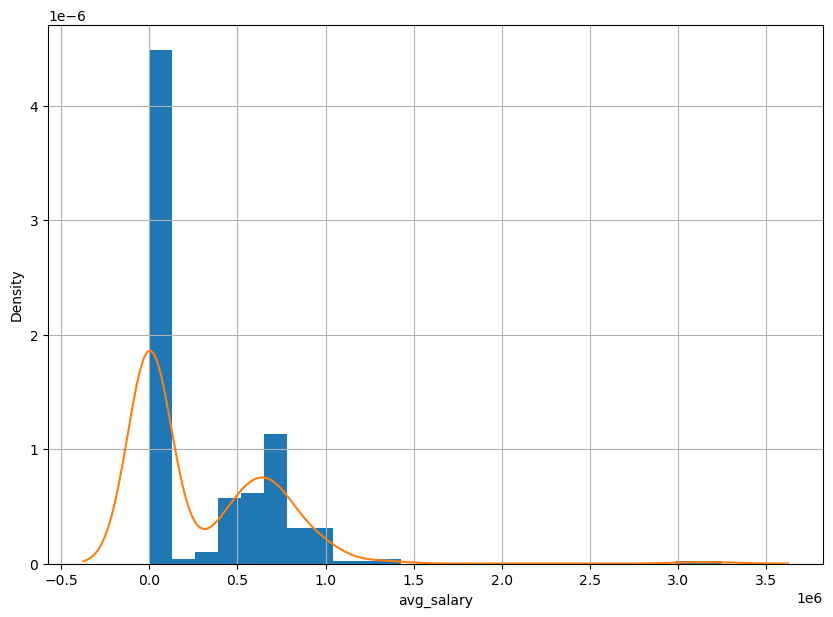

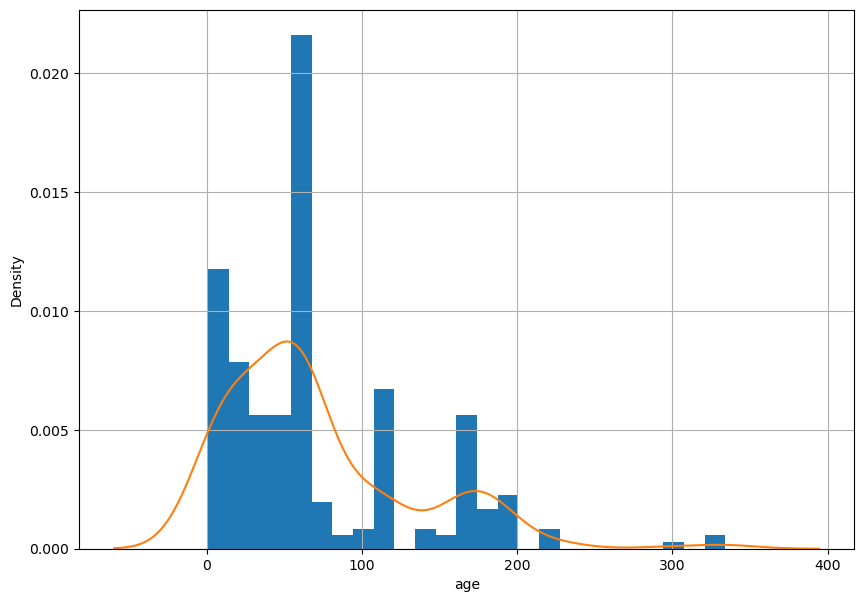

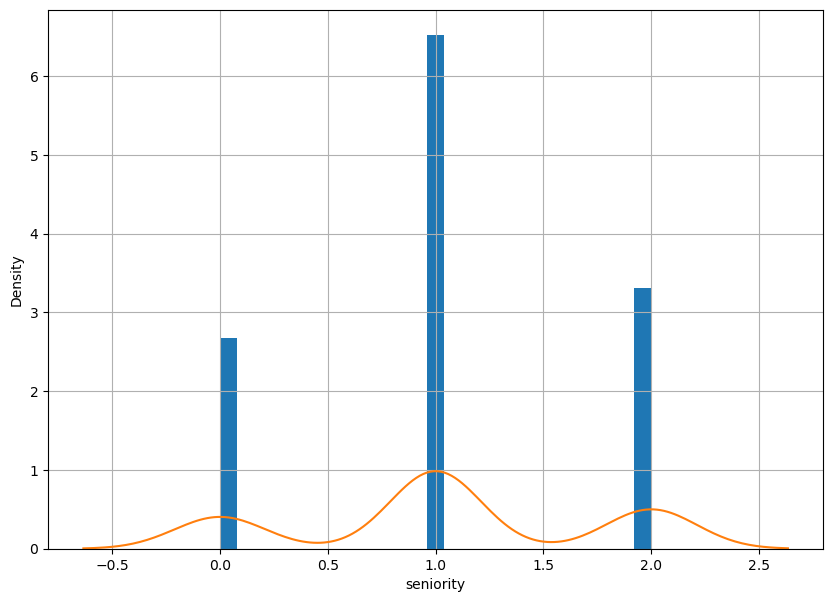

In [56]:
for col in df.select_dtypes('number').columns:
    plt.figure(figsize = (10,7))
    df[col].hist(bins = 25, density = True)
    sns.kdeplot(df[col])

In [57]:
# we noticed we mostly have skewed data so maybe we can apply minmax scaling
# we can even try later during modelling which scaler gives us better accuracy

# also before scaling we require train_test_split
# and we also know that we decided to keep the -1 values salary columns rows as the test set , so lets do it

# Filter once for training data
train_data = df[df['avg_salary'] != -1]

# Now split into features (xtrain) and target (ytrain) this was required for the modelling phase purpose but since we are still in eda phase,
# we can scale both features and target column together
#xtrain = train_data.drop('avg_salary', axis=1)
#ytrain = train_data['avg_salary']  # Selecting a single column doesn't need .loc

# For test data
#xtest = df[df['avg_salary'] == -1].drop('avg_salary', axis=1)

In [58]:
# also note that we do not need the min max salary and job_title because we have avg salary and job_simp
train_data = train_data.drop(columns = ['job_title','min_salary', 'max_salary'])

In [59]:
min_max_scaler = MinMaxScaler()
#xtrain_trf = min_max_scaler.fit_transform(xtrain)
#xtest_trf = min_max_scaler.transform(xtest)

train_scaled = pd.DataFrame(min_max_scaler.fit_transform(train_data.select_dtypes(include=['number'])),
                         columns=train_data.select_dtypes(include=['number']).columns)

In [60]:
train_scaled.dropna() # due to scaling our seniority column lost its ordinal behaviour
# thus its corr got affected and became positive with avg_salary

rating  employer_estimate  avg_salary       age  seniority
0    0.71875                0.0    0.168079  0.558559        1.0
1    0.71875                0.0    0.183485  0.489489        0.0
4    0.75000                0.0    0.168079  0.072072        0.5
5    0.75000                1.0    0.429980  0.123123        1.0
7    0.71875                1.0    0.004006  0.489489        0.0
..       ...                ...         ...       ...        ...
167  0.62500                0.0    0.245109  0.321321        0.5
168  0.62500                0.0    0.198891  0.210210        1.0
170  0.68750                0.0    0.152673  0.027027        1.0
171  0.75000                1.0    0.001695  0.072072        0.5
172  0.56250                1.0    0.198891  0.000000        0.5

[123 rows x 5 columns]

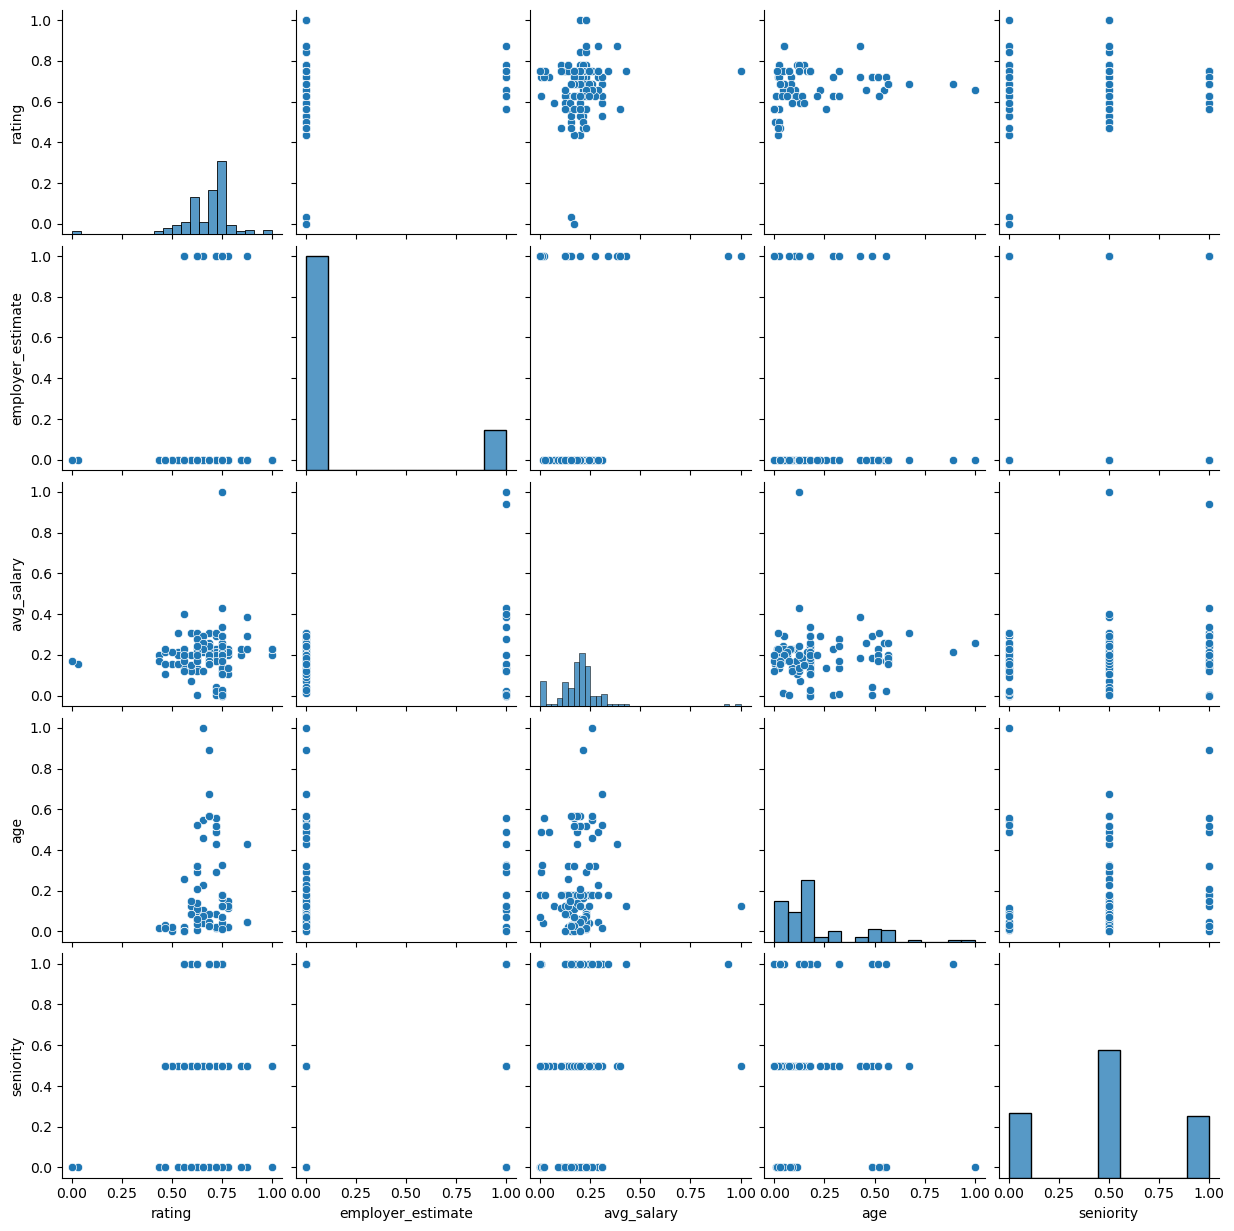

In [61]:
sns.pairplot(train_scaled)

<AxesSubplot:>

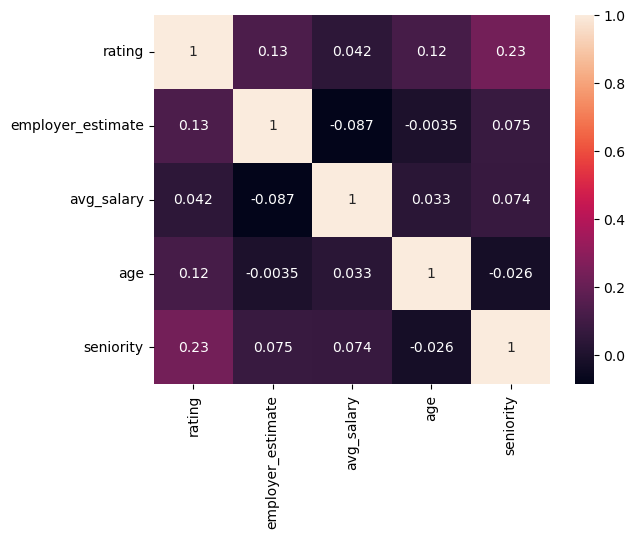

In [62]:
sns.heatmap(train_scaled.corr(), annot = True) # without including the categorical columns we are not seeing any particular strongly related column with avg_salary column
# so lets try encoding and scaling with categorical data columns as well and then plotting correlations
# but before looking into the correlations of categorical columns with salary column lets plot the bar graphs for wach one

<AxesSubplot:>

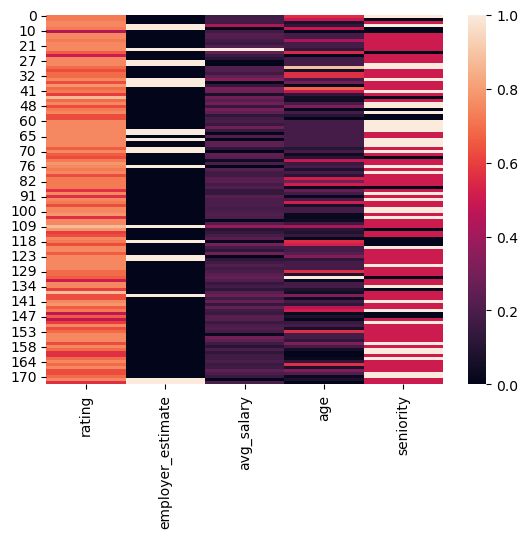

In [63]:
sns.heatmap(train_scaled.dropna()) # this is plotting the indexes against the column names 

In [64]:
# xtrain = df[df['avg_salary'] != -1].drop('avg_salary', axis = 1)
# xtest = df[df['avg_salary'] == -1].drop('avg_salary', axis = 1)

# ytrain = df[df['avg_salary'] != -1].loc[:,'avg_salary']

<AxesSubplot:>

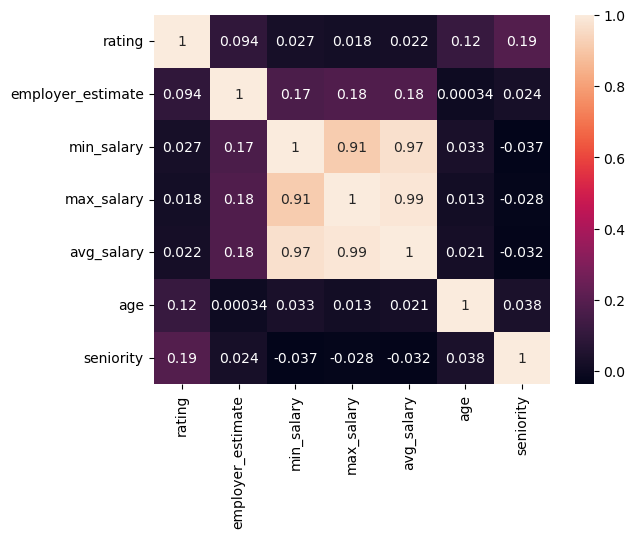

In [65]:
sns.heatmap(df.select_dtypes(['number']).corr(), annot = True) 

## `5) how the age of the company affects salary`

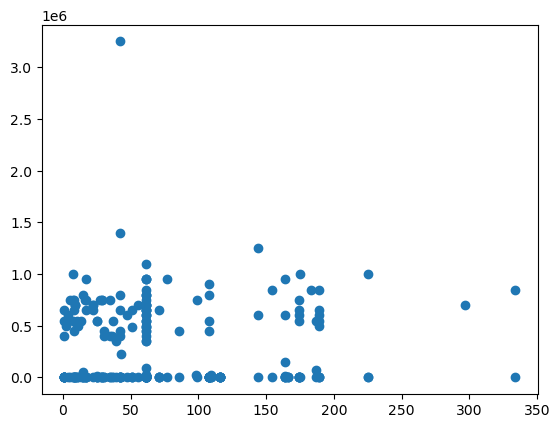

In [66]:
plt.scatter(df['age'], df['avg_salary']) # there is no linear relation between age and salary .. no trend as age of company inc then salary of employee inc or dec

## `6) Barplots of various categorical columns with avg_salary`

In [67]:
catcols = df.select_dtypes(['object']).columns
catcols

Index(['company_name', 'location', 'job_title', 'job_description', 'Size',
       'Founded', 'Type', 'Industry', 'Sector', 'Revenue', 'skills',
       'job_simp'],
      dtype='object')

In [68]:
df[catcols[0]].value_counts()

Boston Consulting Group    77
Cencora                    14
BOEING                     13
Adobe                       9
S&P Global                  8
                           ..
RELX                        1
Alignerr                    1
Lincode                     1
Medtek.AI                   1
Isaac Luxe                  1
Name: company_name, Length: 123, dtype: int64

### does the size of the company affect the salary - NO from below barplot of size with avg_salary

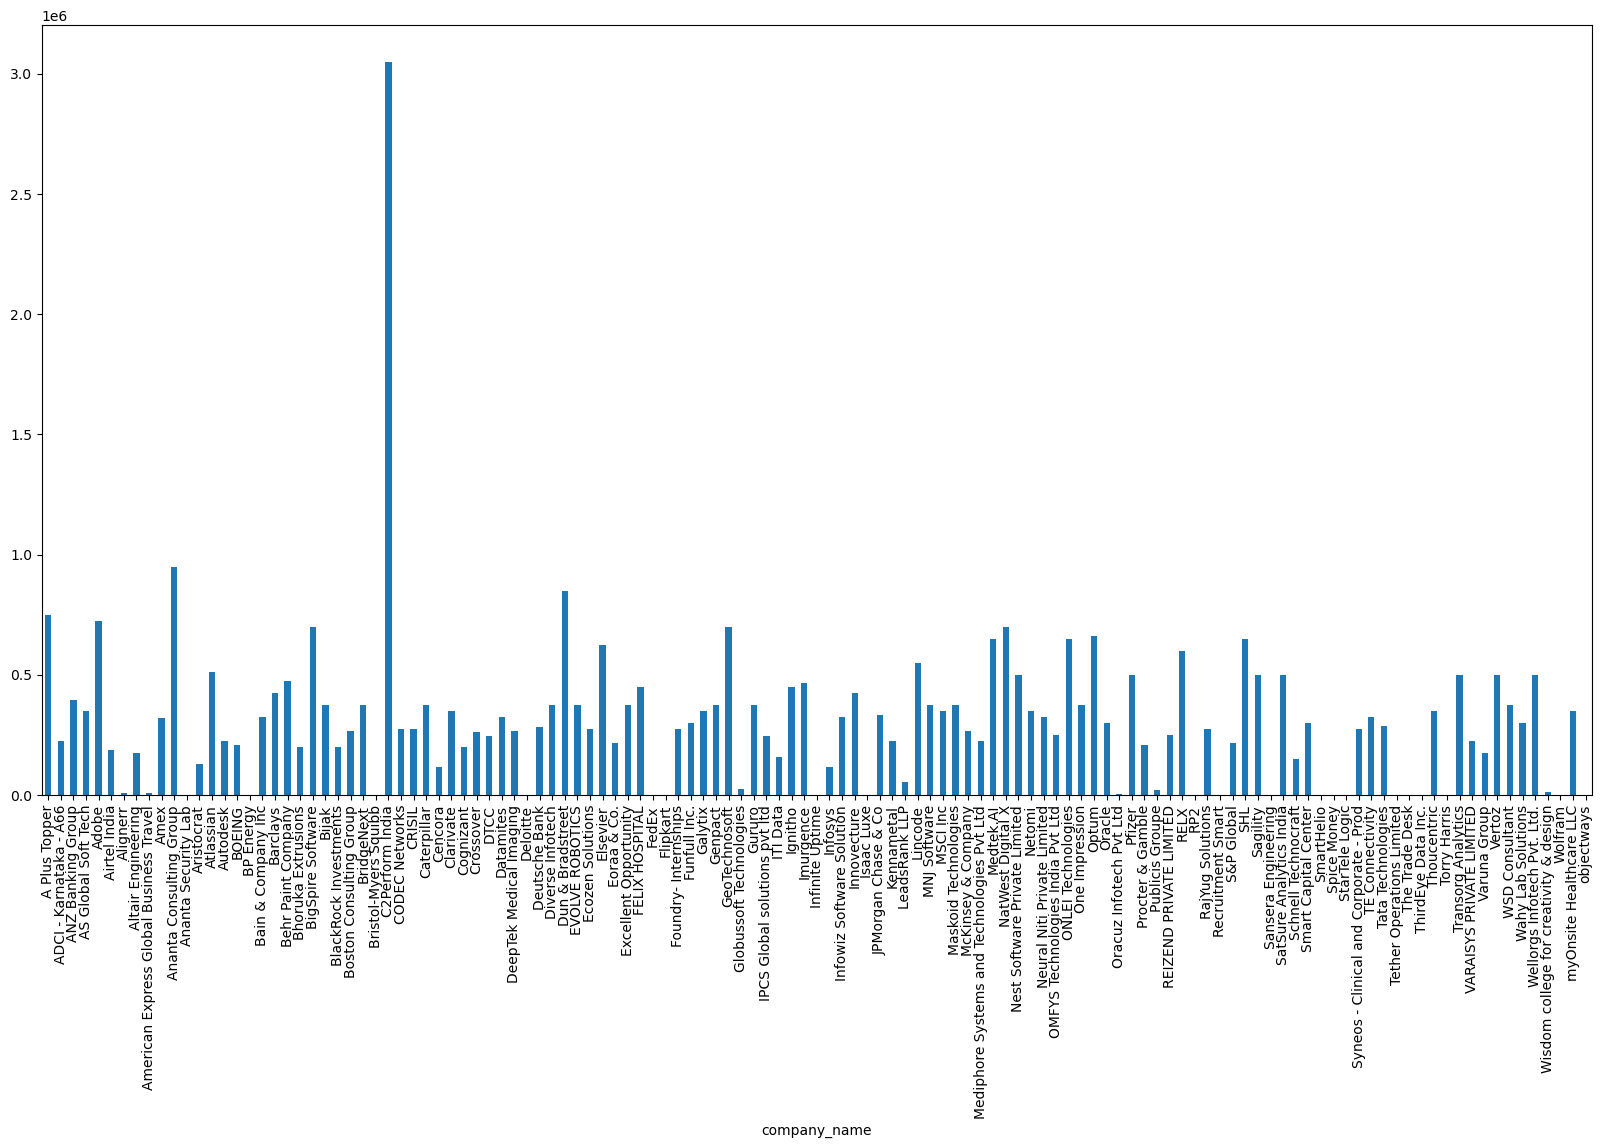

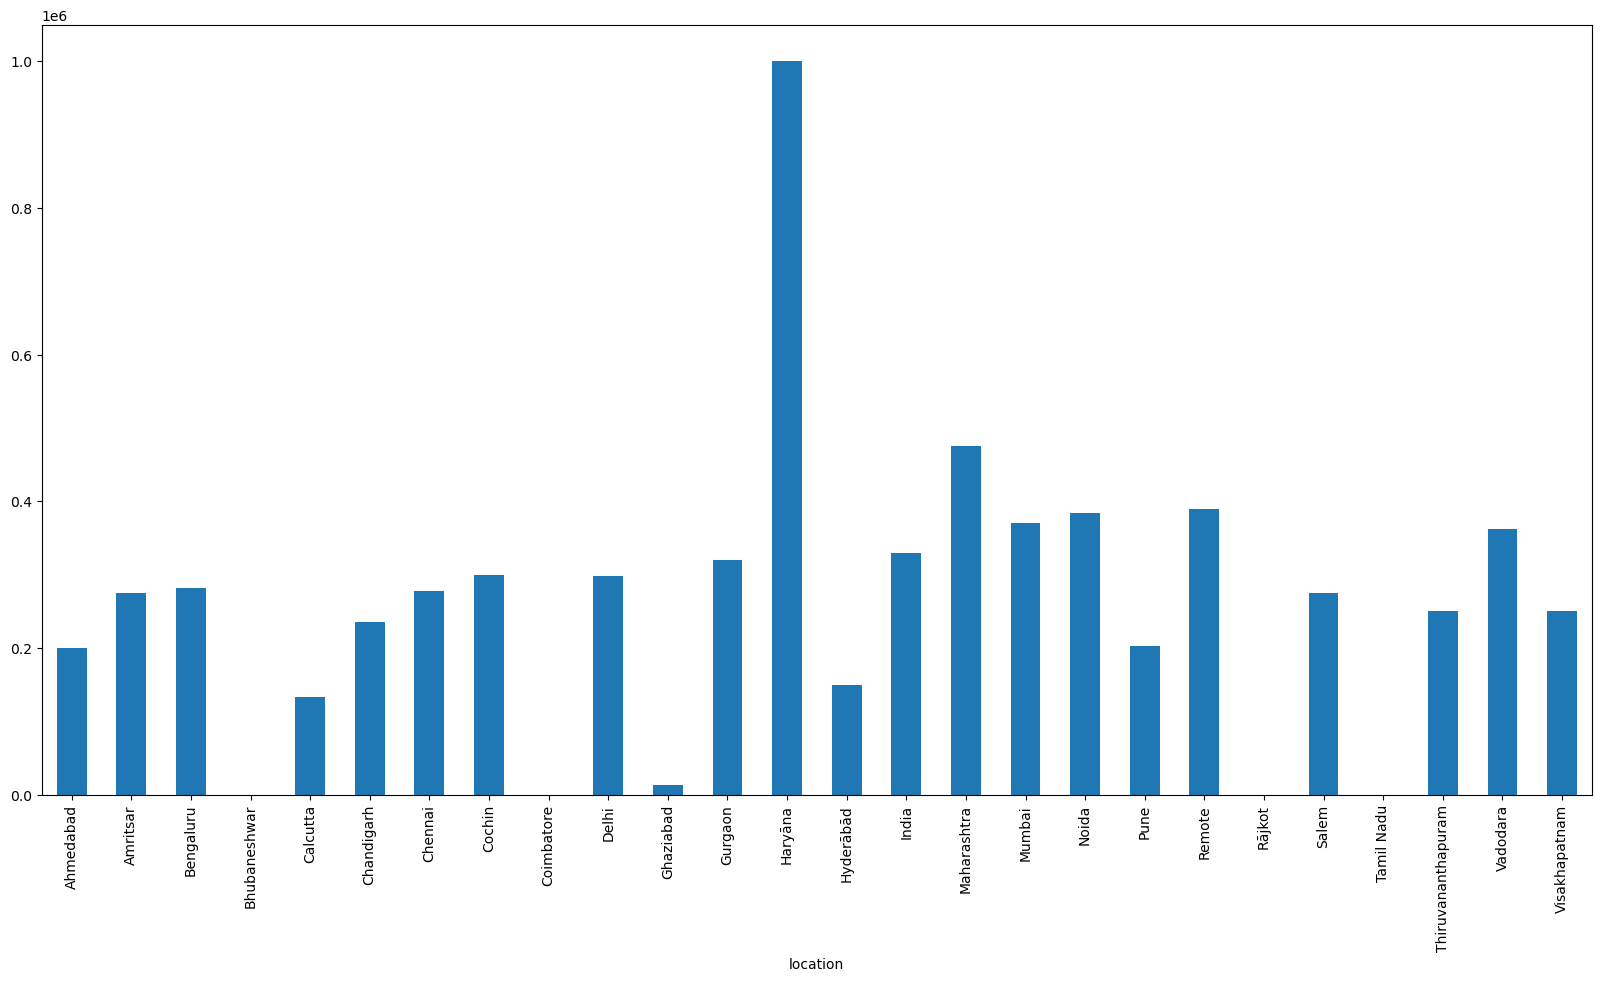

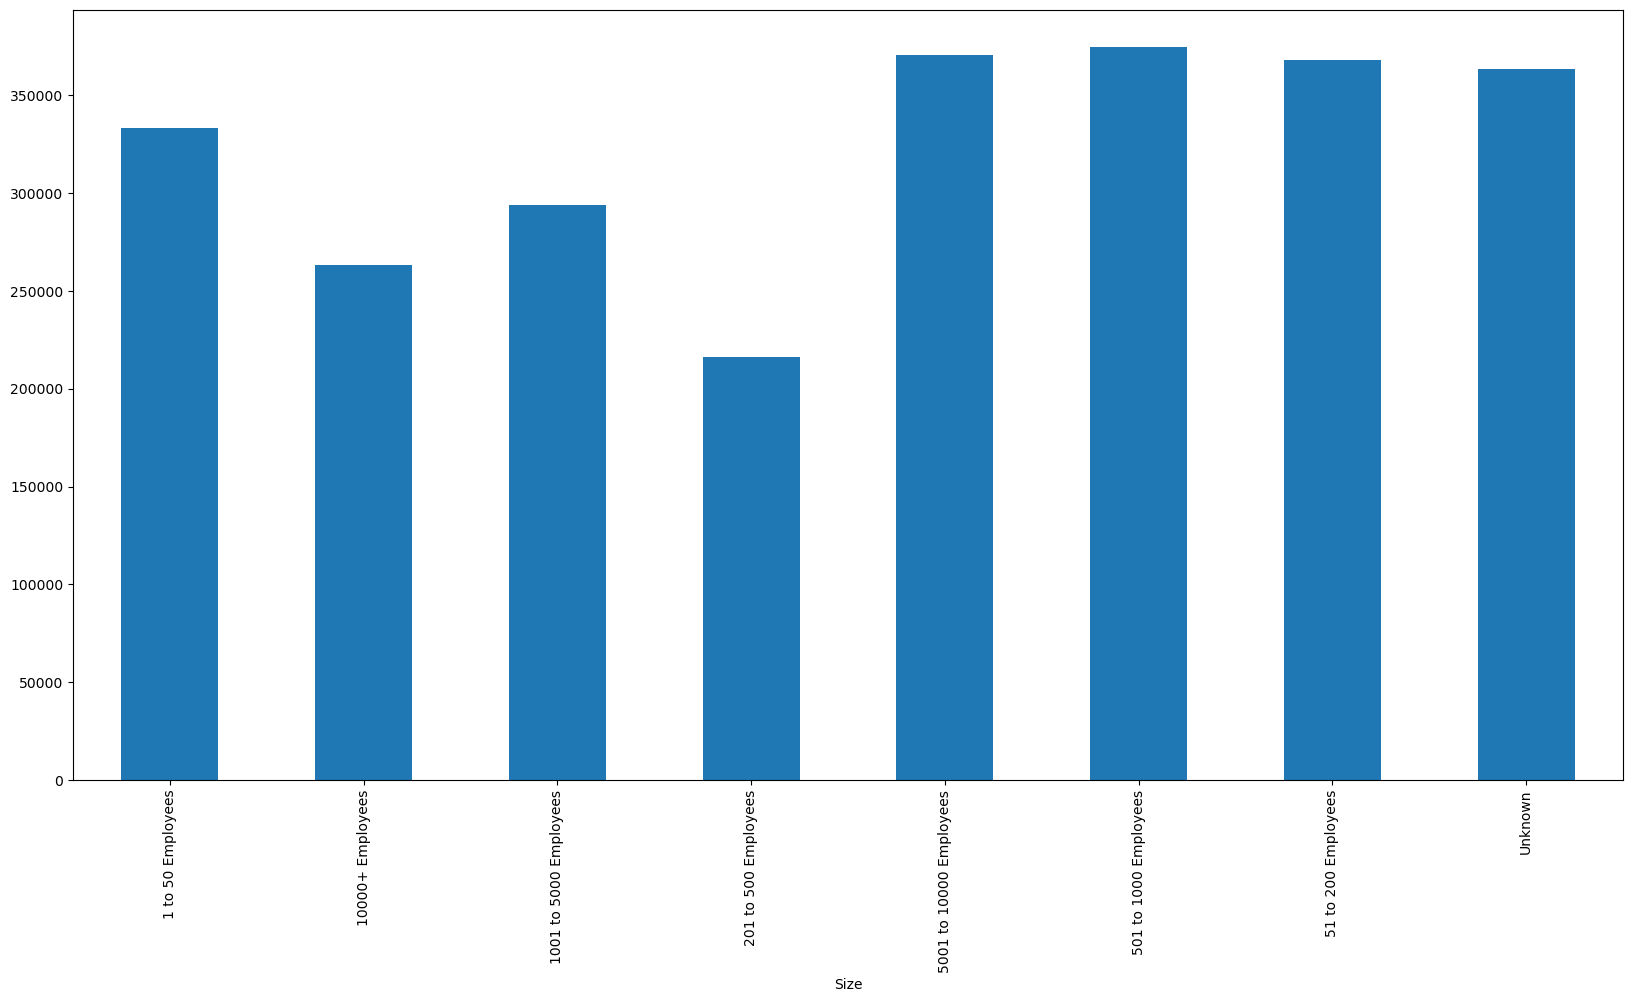

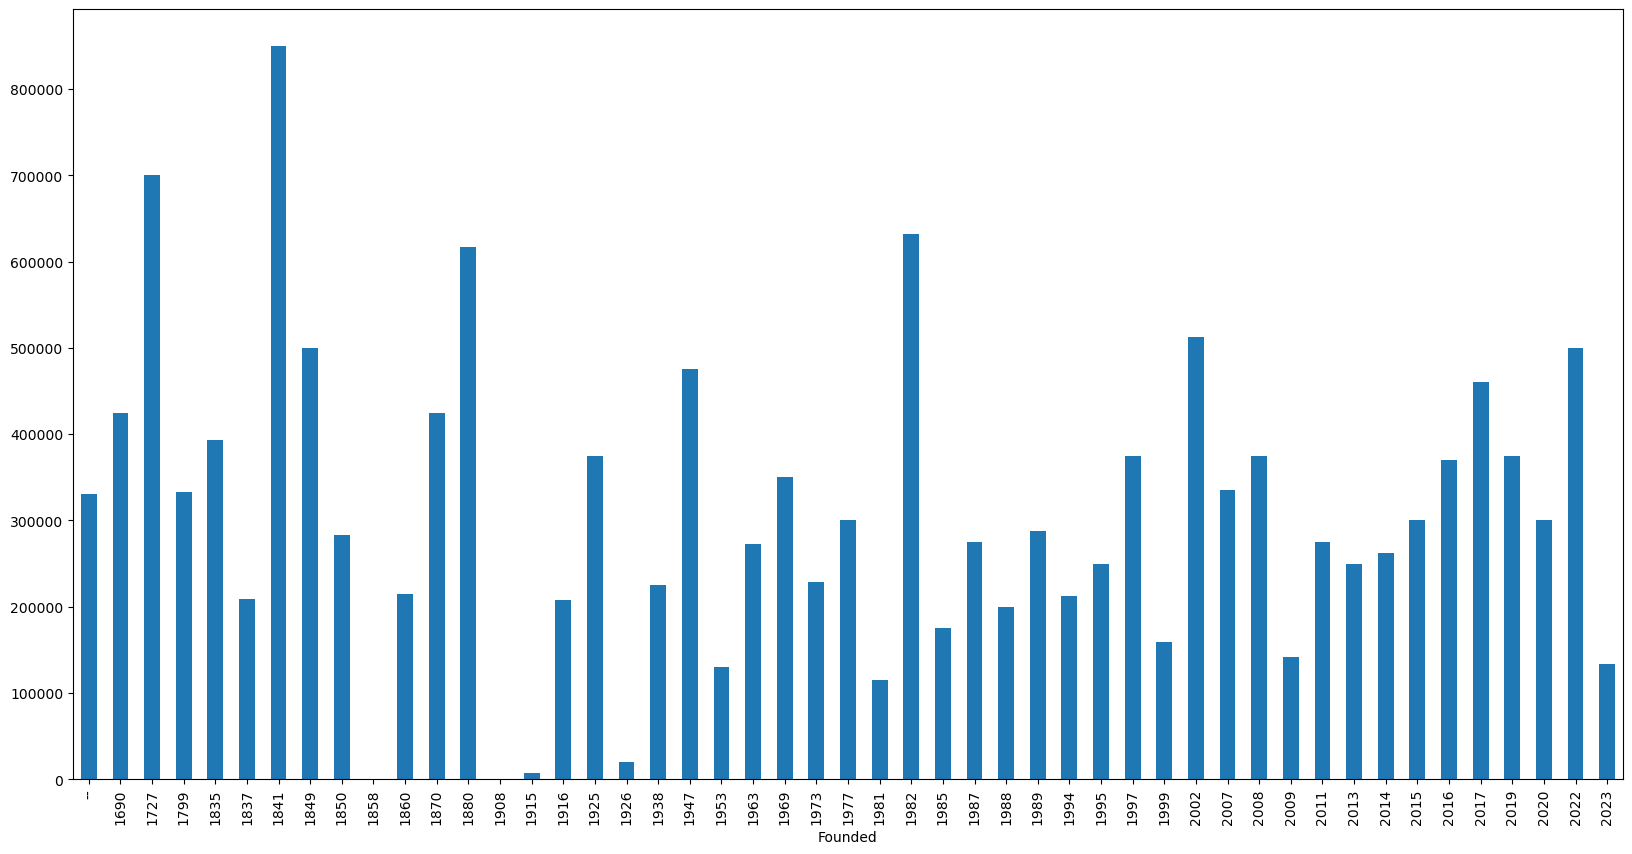

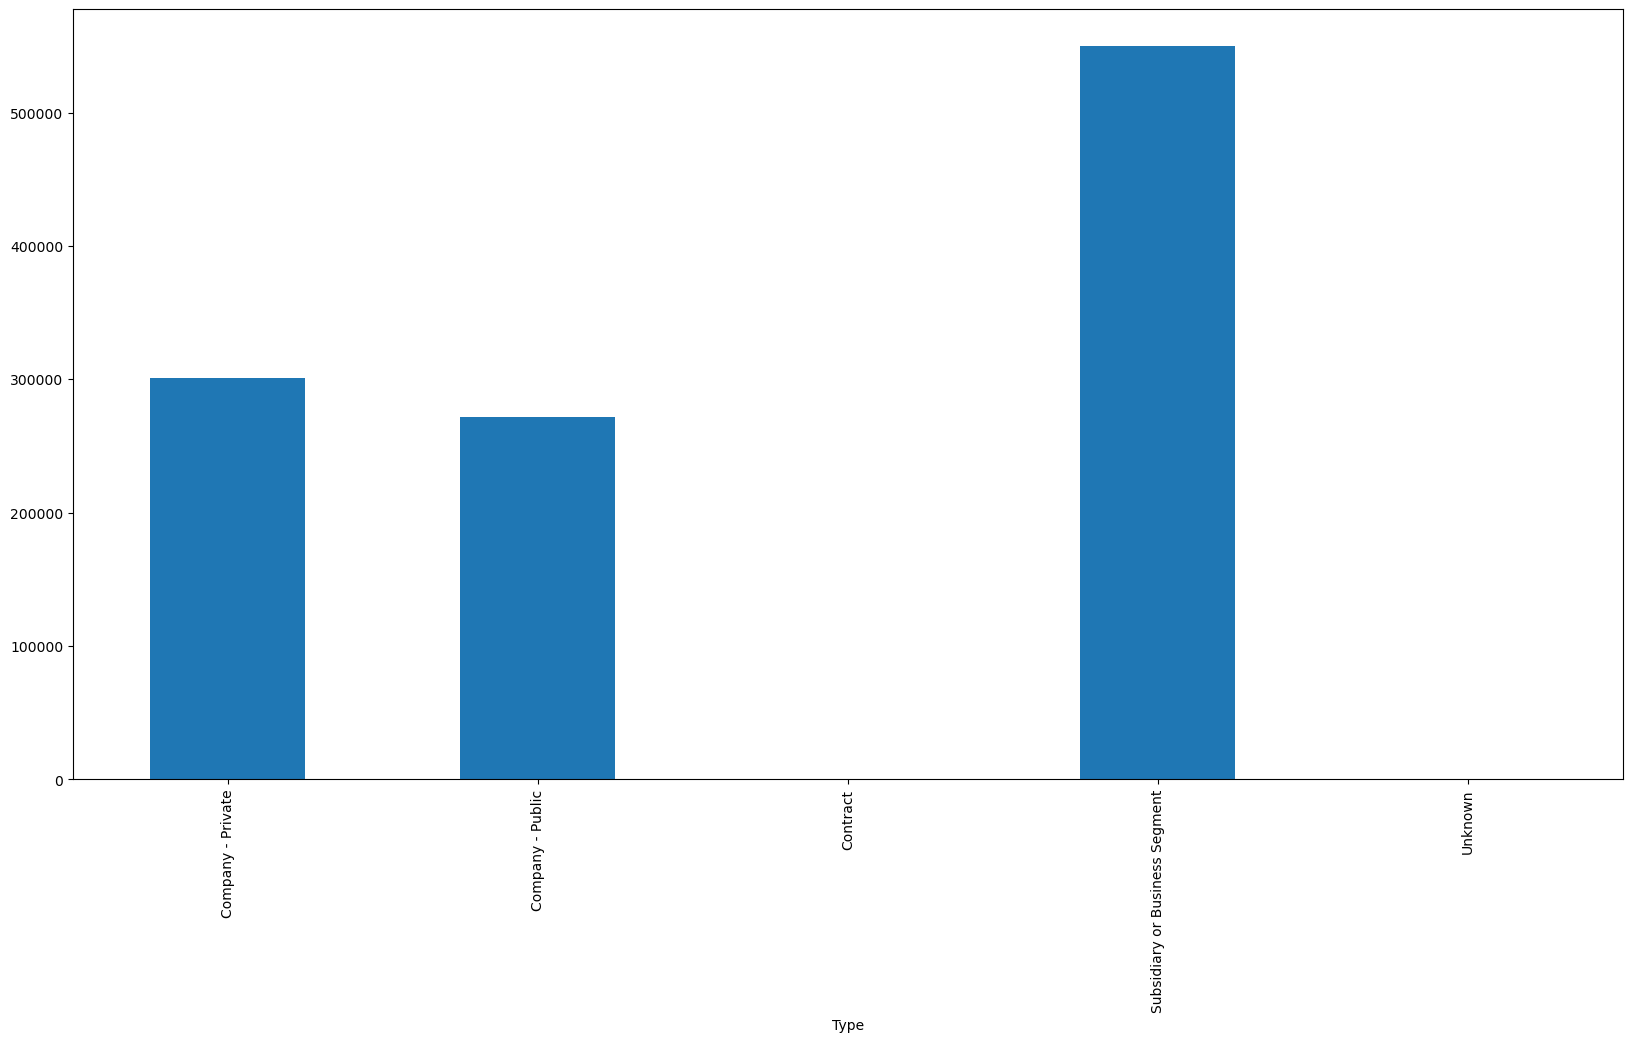

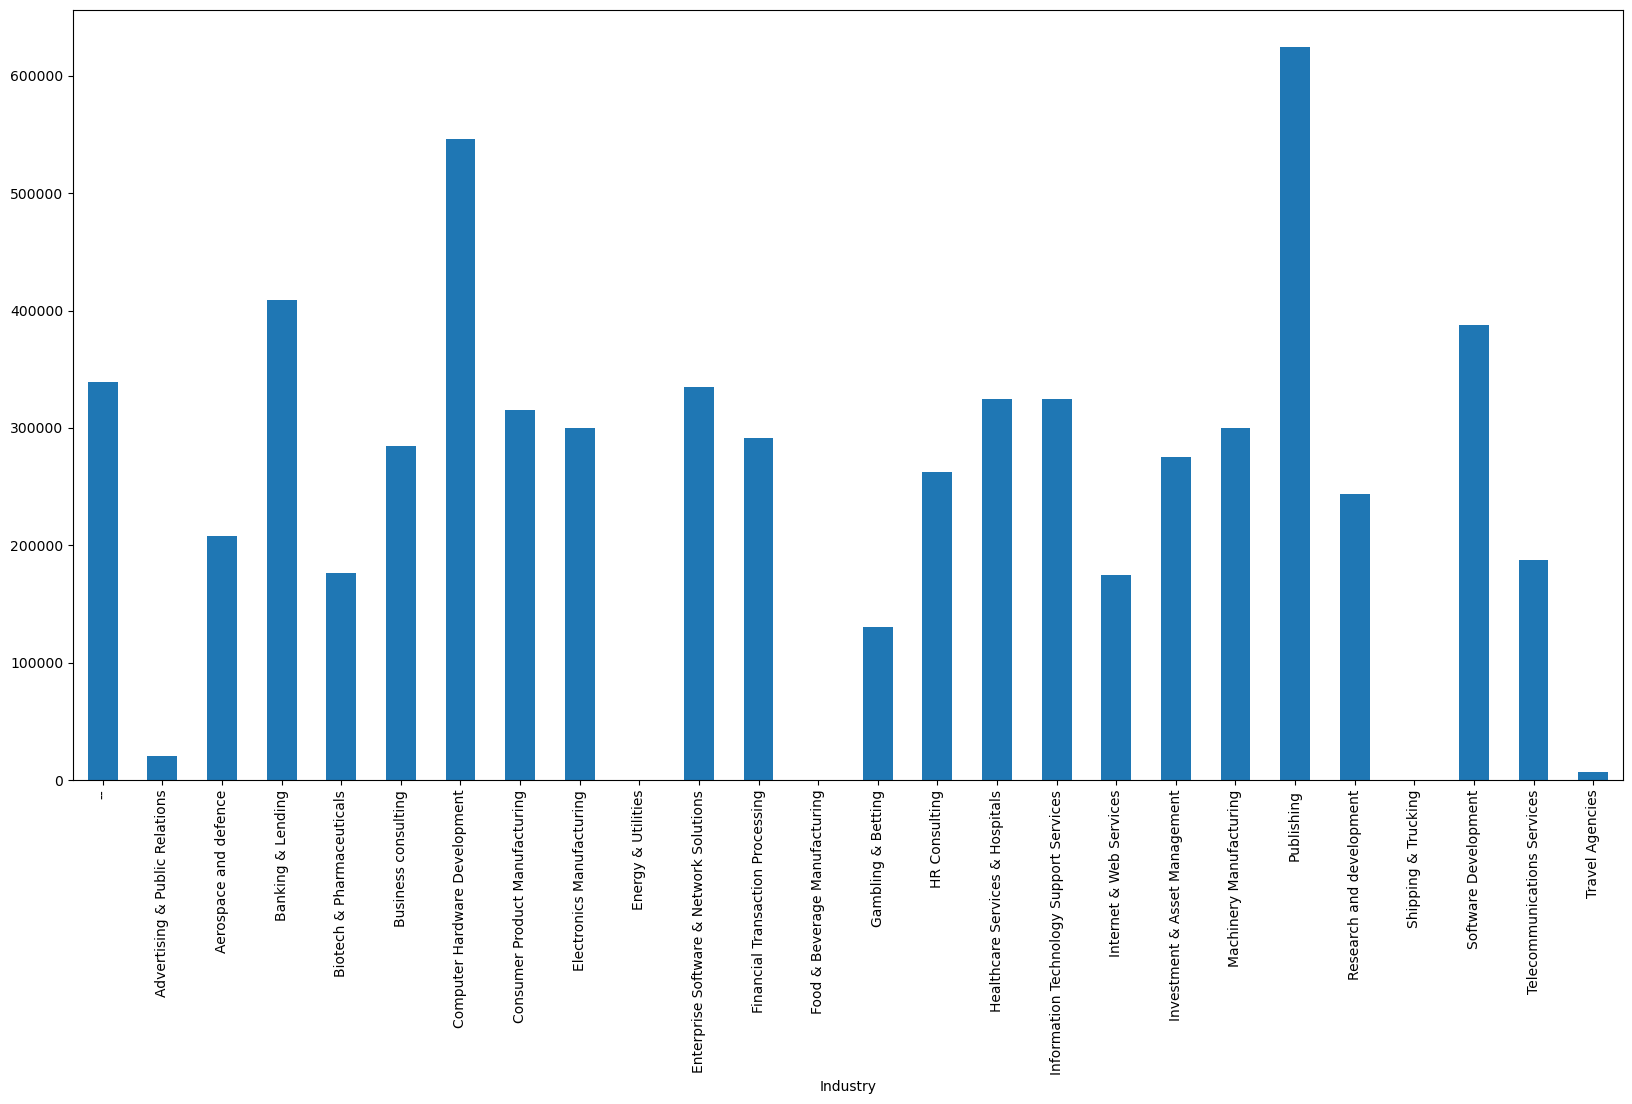

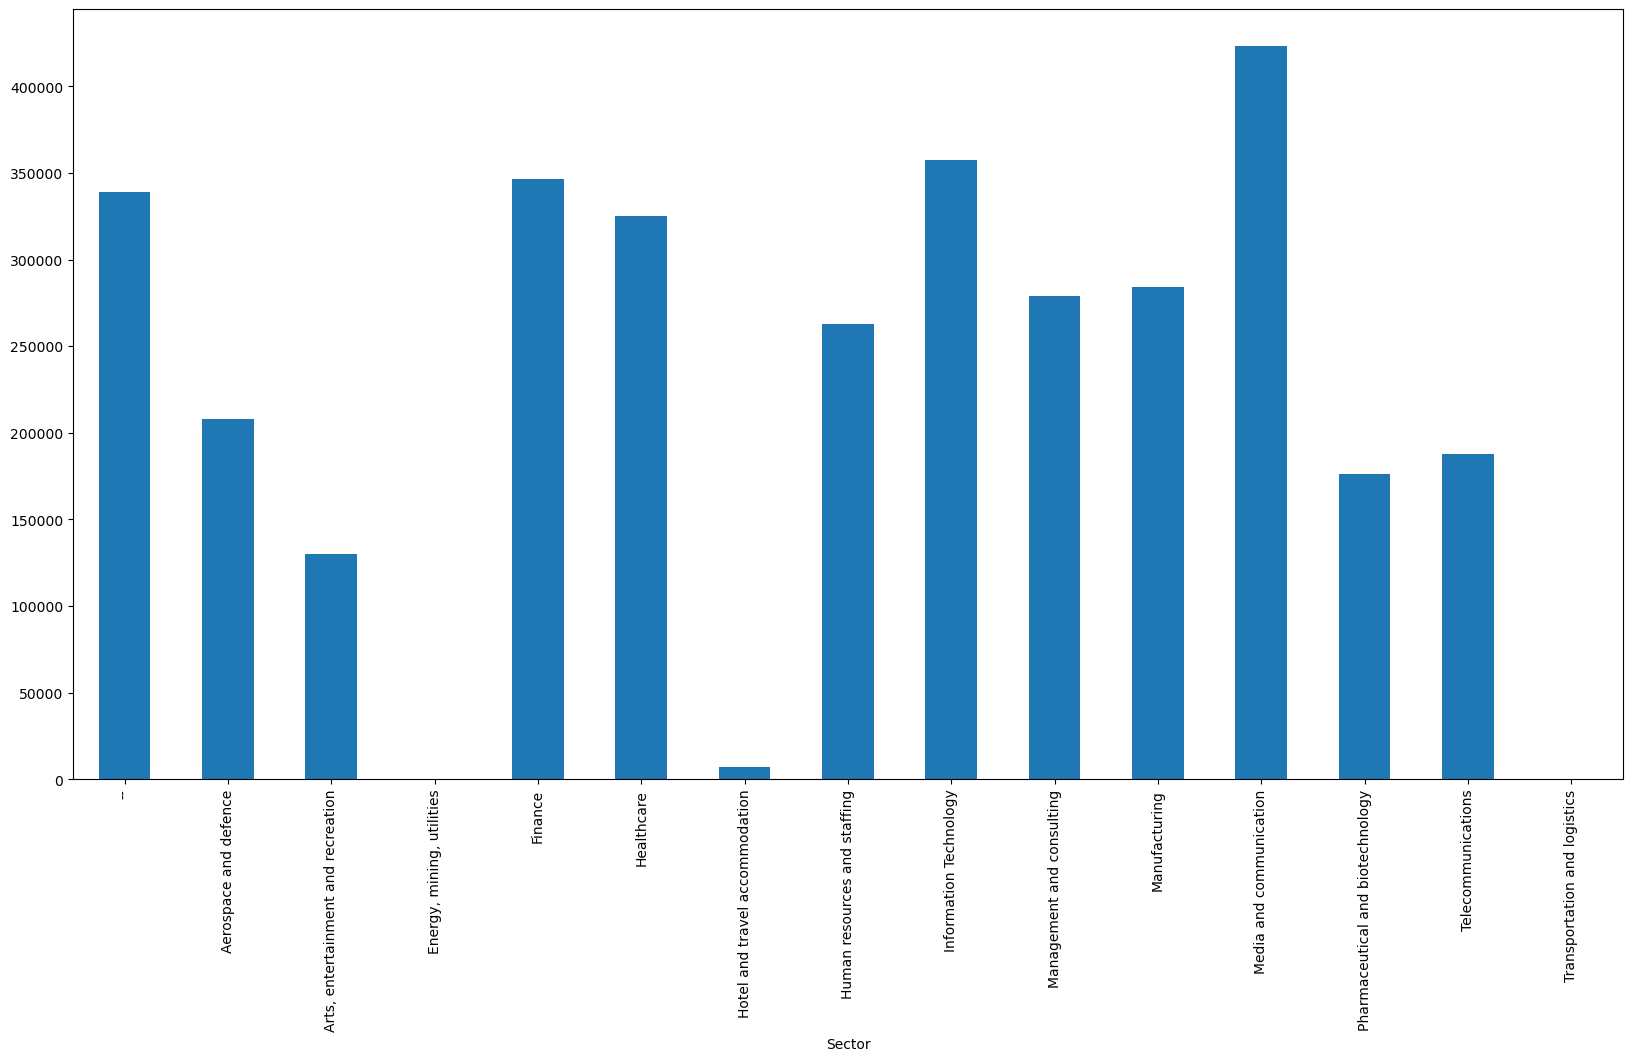

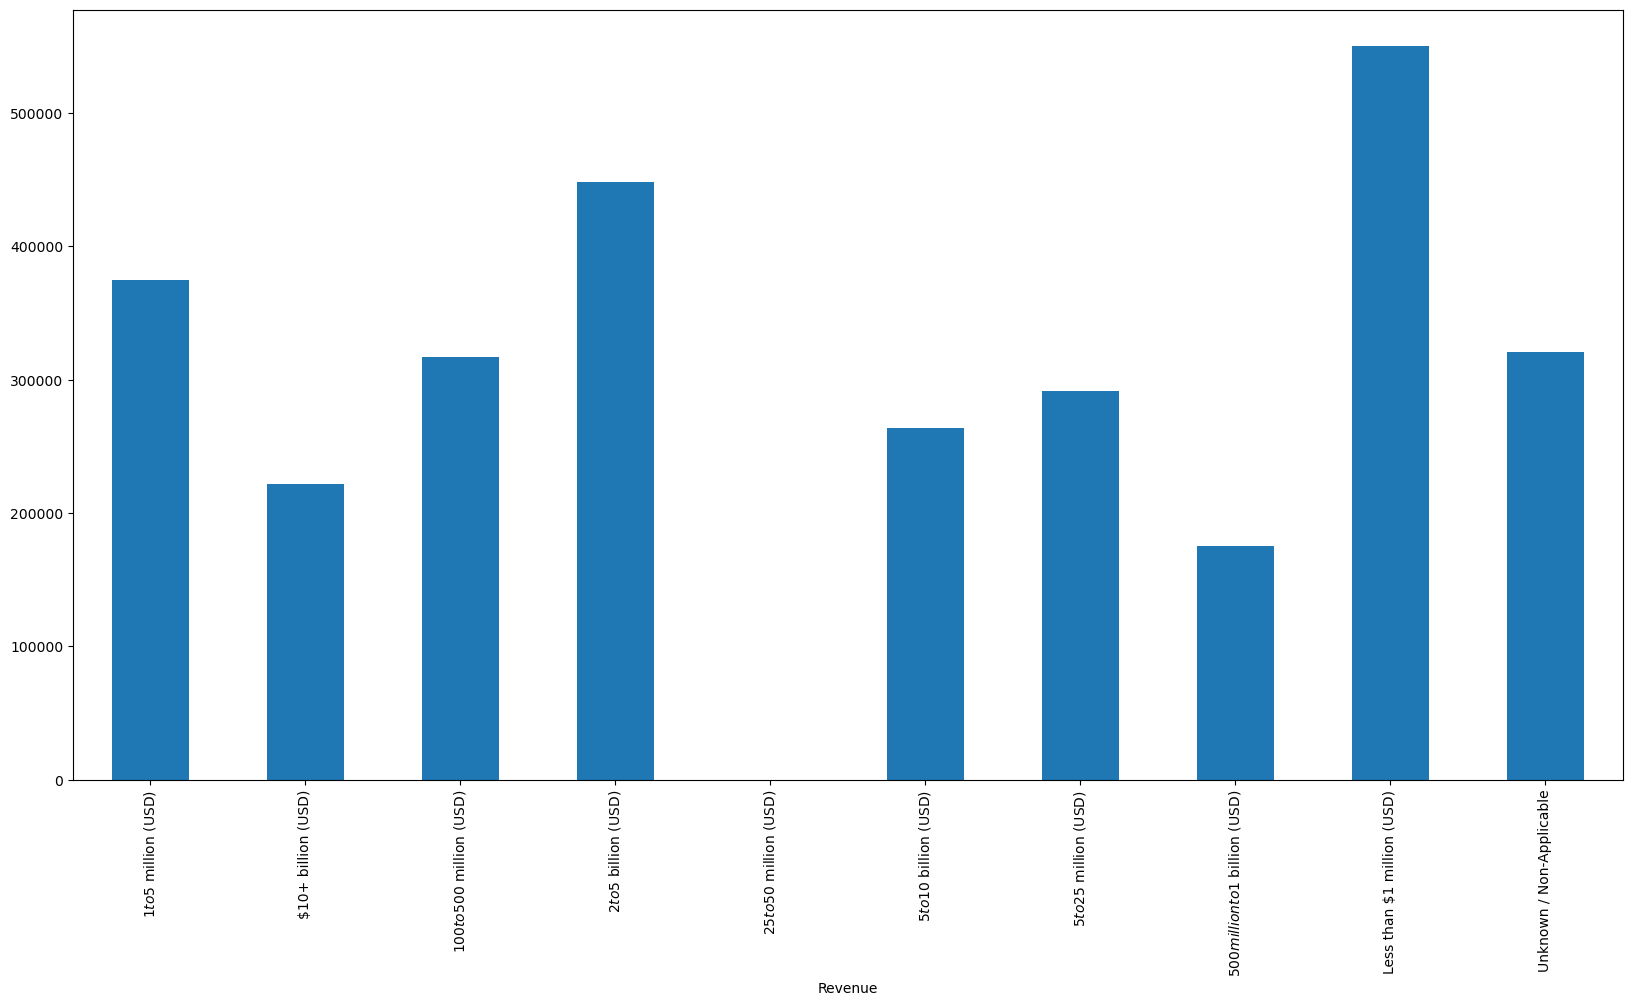

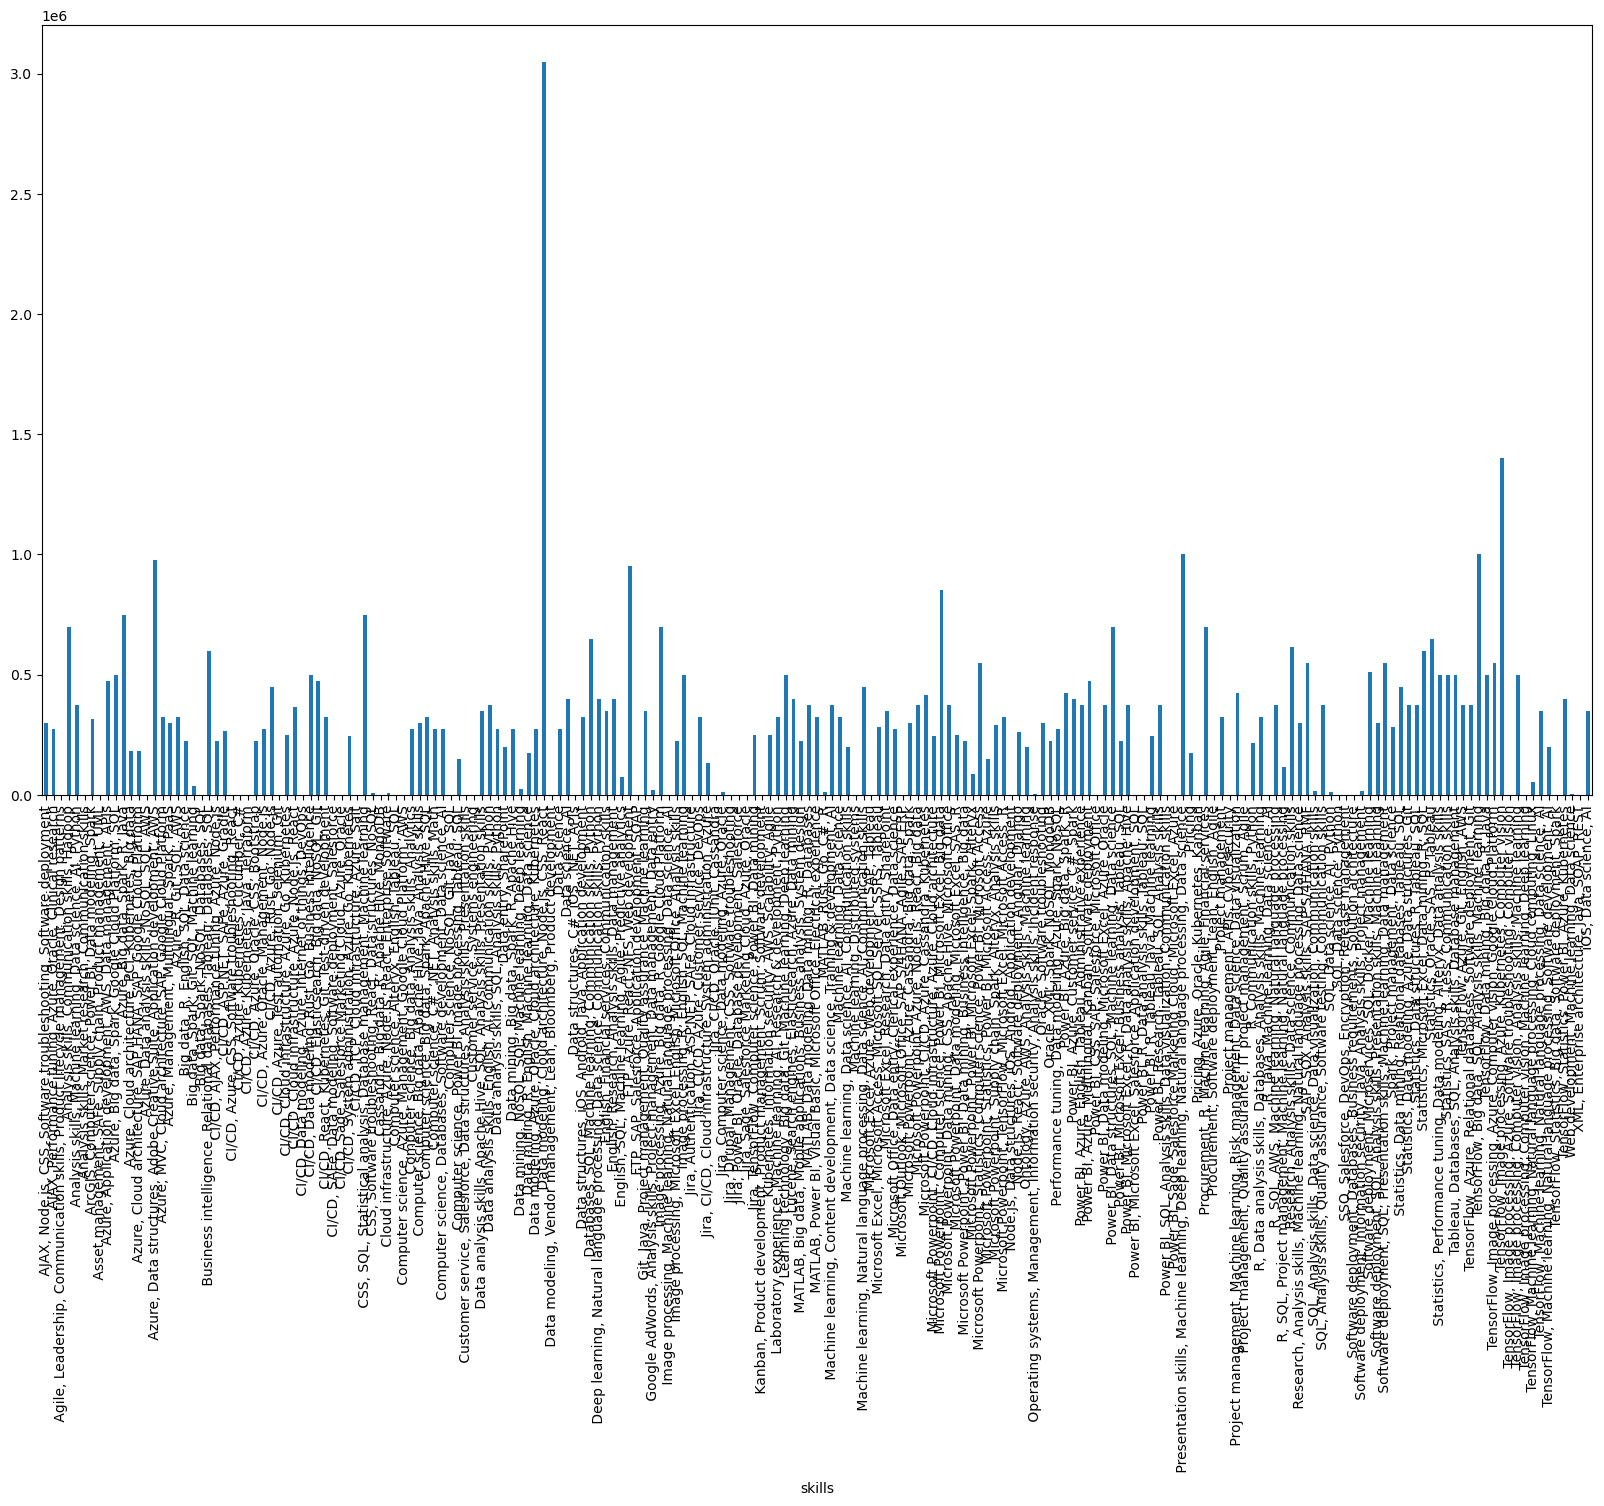

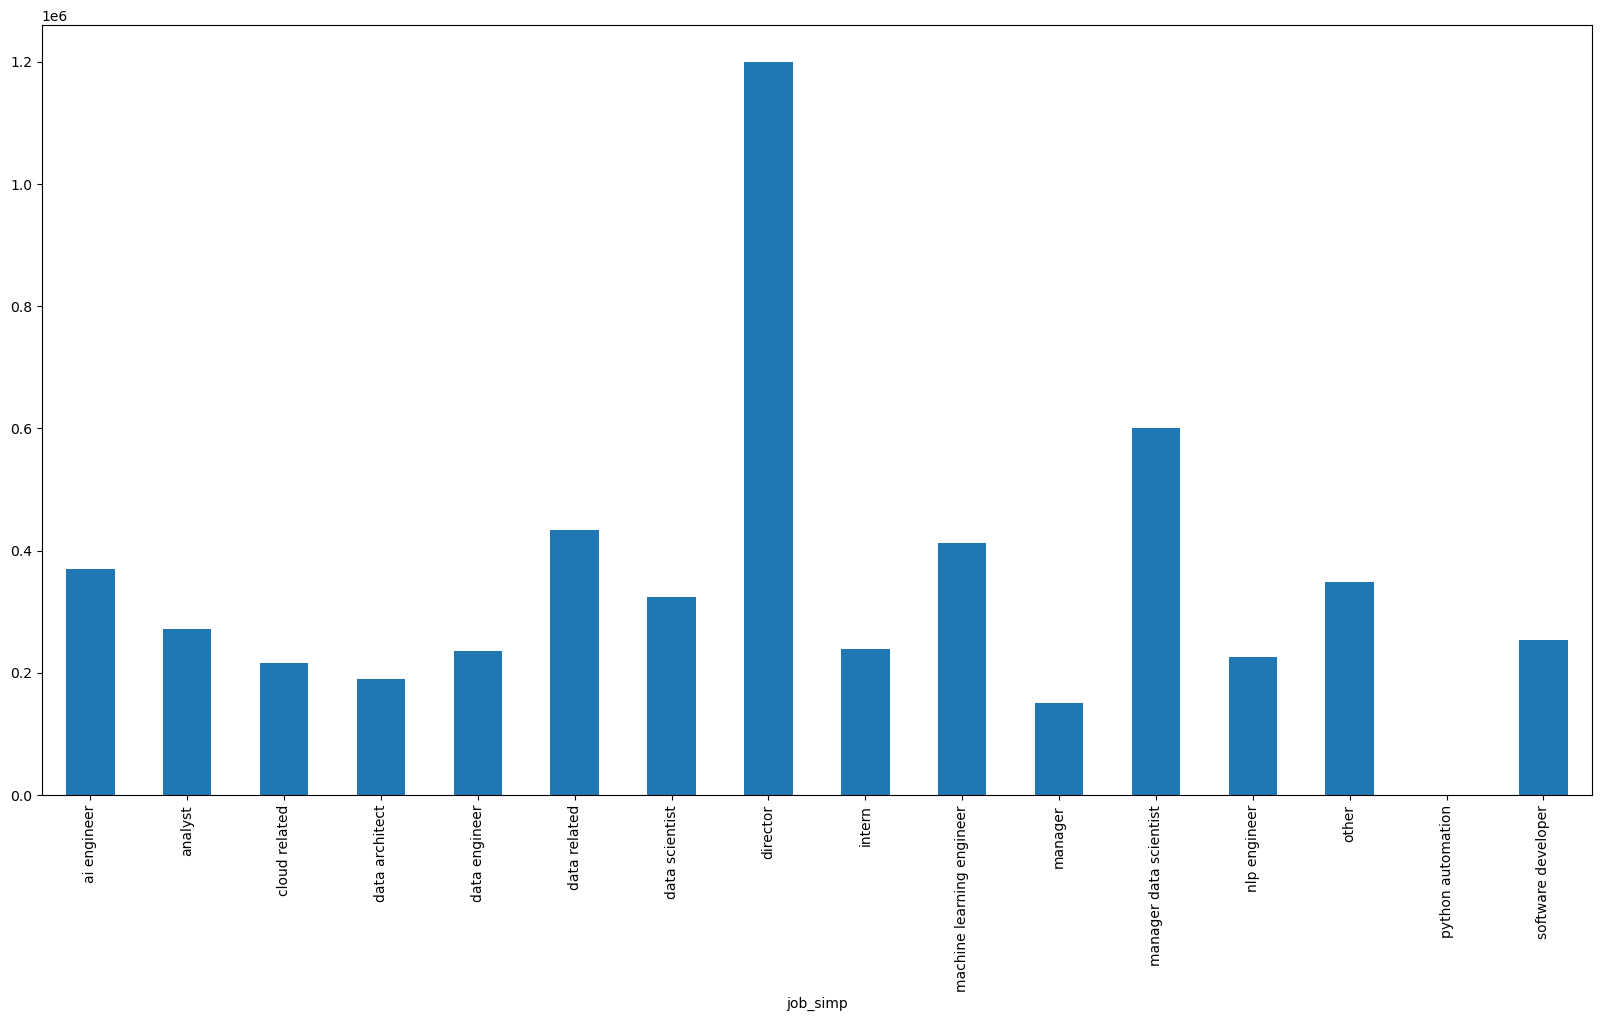

In [69]:
for col in df.select_dtypes(['object']).columns:
    if col != 'job_title' and col != 'job_description': # since they have huge no of categories
        plt.figure(figsize = (20,10))
        df.groupby(col).mean()['avg_salary'].plot(kind = 'bar')

## `7) do higher rated companies pay well acc to our data`
#### No we could not find any such trend in our data from below plot

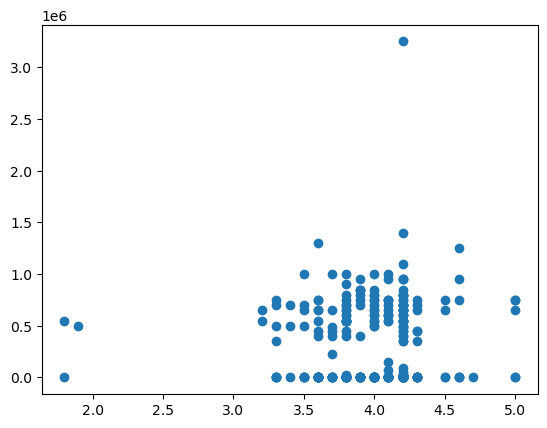

In [70]:
plt.scatter(df['rating'],df['avg_salary'])

In [71]:
## `to see outliers in avgsalary acc to catcols`
# for col in df.select_dtypes(['object']).columns:
#     plt.figure(figsize = (20,10))
#     sns.boxplot(x=col, y='avg_salary', data=df)
#     sns.violinplot(x=col, y='avg_salary', data=df)


## `8) Skills needed for different profiles`

In [72]:
df['skills'].value_counts()

 Data science                                                                        11
 Microsoft Powerpoint, Statistics, Power BI, Microsoft Access, Azure                  9
 CI/CD, Cloud infrastructure, Azure, Node.js, React                                   6
 Azure, Cloud architecture, PCI, Kubernetes, Big data                                 5
 Oracle, XML, Spark, NoSQL, MongoDB                                                   5
                                                                                     ..
 Analysis skills, Communication skills, Hadoop                                        1
 Google AdWords, Analysis skills, Project management, Data management, Data entry     1
 Data modeling, Cloud architecture, Node.js, CSS, React                               1
 Software deployment, SQL, Presentation skills, Machine learning, Data management     1
 Power BI, Microsoft Excel, Salesforce, Application development, SQL                  1
Name: skills, Length: 199, dtype

In [73]:
# since we have a nan value in the skills column for the test data part so we can use the train set to analyse profile wise skills 
df[df.skills.isna()]

company_name location       job_title  \
370   SmartHelio    Delhi  data scientist   

                                       job_description  rating  \
370  Join our team as an experienced data scientist...     4.7   

     employer_estimate  min_salary  max_salary  avg_salary               Size  \
370                  0          -1          -1        -1.0  1 to 50 Employees   

    Founded     Type Industry Sector                   Revenue skills  age  \
370      --  Unknown       --     --  Unknown / Non-Applicable    NaN  NaN   

     seniority        job_simp  
370        1.0  data scientist

In [74]:
# Filter once for training data
train_data = df[df['avg_salary'] != -1]

# Now split into features (xtrain) and target (ytrain) this was required for the modelling phase purpose but since we are still in eda phase,
# we can scale both features and target column together
xtrain = train_data.drop('avg_salary', axis=1)
ytrain = train_data['avg_salary']  # Selecting a single column doesn't need .loc

# For test data
xtest = df[df['avg_salary'] == -1].drop('avg_salary', axis=1)

In [75]:
xtrain.job_simp.nunique()

15

In [76]:
df.job_simp.nunique()

16

In [77]:
xtrain.groupby(['job_simp'])['skills'].apply(lambda x : ', '.join(x)).reset_index()

job_simp  \
0                 ai engineer   
1                     analyst   
2               cloud related   
3              data architect   
4               data engineer   
5                data related   
6              data scientist   
7                    director   
8                      intern   
9   machine learning engineer   
10                    manager   
11     manager data scientist   
12               nlp engineer   
13                      other   
14         software developer   

                                               skills  
0    Azure, Big data, Spark, R, Java,  Research, A...  
1    Business intelligence, Relational databases, ...  
2        Jira, CI/CD, Azure, Customer service, DevOps  
3    Azure, Cloud architecture, PCI, Kubernetes, B...  
4    Oracle, XML, Spark, NoSQL, MongoDB,  Microsof...  
5    Databases, SQL, Machine learning, Communicati...  
6    Web development, Machine learning, Data scien...  
7    Data modeling, Cloud architecture, Node.js, C...  
8    MATLAB, Rust, Go, C#, R,  Laboratory experien...  
9    Presentation skills, Machine learning, Deep l...  
10   SAP, SOX, Analysis skills, SAP S/4HANA, RMF, ...  
11   TensorFlow, Big data, SQL, Analysis skills, M...  
12   Software deployment, Information security, Ja...  
13   TensorFlow, Image processing, Azure, Kubernet...  
14   FTP, Azure, React, NFS, Web development,  Git...

In [118]:
# Group by simplified job title and aggregate all skills for each job_simp
skills_per_job = df.dropna(subset = 'skills').groupby('job_simp')['skills'].apply(lambda x: ', '.join(x)).reset_index()

# Split skills into individual skill tags for each job_simp
skills_per_job['skills'] = skills_per_job['skills'].apply(lambda x: list(set(x.split(', '))))

# Preview the result
skills_per_job.head()


job_simp                                             skills
0     ai engineer  [ Research, Django,  Node.js, Natural language...
1         analyst  [Big data, Analytics, Communication skills,  S...
2   cloud related  [CI/CD,  CI/CD,  Jira, Customer service, Azure...
3  data architect  [Data modeling, Big data, SAP HANA, Azure, Sca...
4   data engineer  [NoSQL,  Big data, Data modeling, Big data, Sp...

In [119]:
df.dropna(subset = 'skills').groupby(['job_simp'])['avg_salary'].mean().reset_index()

job_simp    avg_salary
0                 ai engineer  3.699996e+05
1                     analyst  2.719315e+05
2               cloud related  2.166660e+05
3              data architect  1.889700e+05
4               data engineer  2.349995e+05
5                data related  4.333327e+05
6              data scientist  3.275083e+05
7                    director  1.200000e+06
8                      intern  2.392302e+05
9   machine learning engineer  4.115380e+05
10                    manager  1.512052e+05
11     manager data scientist  5.999997e+05
12               nlp engineer  2.261661e+05
13                      other  3.492850e+05
14          python automation -1.000000e+00
15         software developer  2.532686e+05

In [107]:
pd.pivot_table(data = df, index = 'job_simp', values = 'avg_salary')

avg_salary
job_simp                               
ai engineer                3.699996e+05
analyst                    2.719315e+05
cloud related              2.166660e+05
data architect             1.889700e+05
data engineer              2.349995e+05
data related               4.333327e+05
data scientist             3.246604e+05
director                   1.200000e+06
intern                     2.392302e+05
machine learning engineer  4.115380e+05
manager                    1.512052e+05
manager data scientist     5.999997e+05
nlp engineer               2.261661e+05
other                      3.492850e+05
python automation         -1.000000e+00
software developer         2.532686e+05

In [ ]:
# Pivot table initials 
# data: 'DataFrame',
#     values=None,
#     index=None,
#     columns=None,
#     aggfunc: 'AggFuncType' = 'mean',
#     fill_value=None,
#     margins: 'bool' = False,
#     dropna: 'bool' = True,
#     margins_name: 'str' = 'All',
#     observed: 'bool' = False,
#     sort: 'bool' = True,
# ) -> 'DataFrame'

In [120]:
job_salary = df.dropna(subset = 'skills').groupby(['job_simp'])['avg_salary'].mean().reset_index()
job_salary.shape

(16, 2)

In [121]:
skills_per_job.shape

(16, 2)

In [124]:
skills_per_job.isna().sum()

job_simp    0
skills      0
dtype: int64

In [126]:
skills_per_job = skills_per_job.merge(job_salary, on = 'job_simp') # join performed

In [128]:
skills_per_job.head()

job_simp                                             skills  \
0     ai engineer  [ Research, Django,  Node.js, Natural language...   
1         analyst  [Big data, Analytics, Communication skills,  S...   
2   cloud related  [CI/CD,  CI/CD,  Jira, Customer service, Azure...   
3  data architect  [Data modeling, Big data, SAP HANA, Azure, Sca...   
4   data engineer  [NoSQL,  Big data, Data modeling, Big data, Sp...   

      avg_salary  
0  369999.600000  
1  271931.530864  
2  216666.000000  
3  188970.000000  
4  234999.464286

# start from here 

### `visualizations on various skills for different job titles`

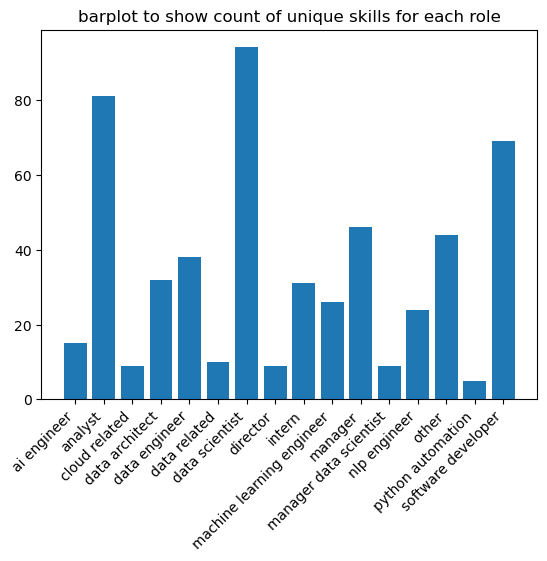

In [134]:
plt.bar(skills_per_job['job_simp'], skills_per_job['skills'].apply(lambda x : len(x)))
plt.title("barplot to show count of unique skills for each role")
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [139]:
skills_per_job.skills.apply(len).sum()

542

In [143]:
len(skills_per_job.skills.sum())

542

In [142]:
len(set(skills_per_job.skills.sum()))

229

In [146]:
skills_per_job['skills'][0]

[' Research',
 'Django',
 ' Node.js',
 'Natural language processing',
 'Angular',
 'Software deployment',
 'React',
 'Big data',
 'Data science',
 'Spark',
 'Analysis skills',
 'Machine learning',
 'Java',
 ' Azure',
 'R']

In [154]:
for i in range(skills_per_job.shape[0]):
    print(f"{skills_per_job['job_simp'][i]} - Skills ")
    for skill in skills_per_job['skills'][i]:
        print(f"\t      {skill.strip()}")

ai engineer - Skills 
	      Research
	      Django
	      Node.js
	      Natural language processing
	      Angular
	      Software deployment
	      React
	      Big data
	      Data science
	      Spark
	      Analysis skills
	      Machine learning
	      Java
	      Azure
	      R
analyst - Skills 
	      Big data
	      Analytics
	      Communication skills
	      SQL
	      SSRS
	      Agile
	      Hadoop
	      English
	      Apache Hive
	      Data structures
	      Alteryx
	      Software deployment
	      Asset management
	      Supply chain
	      Oracle
	      Data science
	      Analysis skills
	      Microsoft Office
	      Data modeling
	      Data entry
	      R
	      Microsoft SQL Server
	      MATLAB
	      Salesforce
	      Business intelligence
	      Data management
	      Data mining
	      Microsoft Outlook
	      Tableau
	      Business intelligence
	      Data analysis skills
	      Electrical experience
	      AWS
	      Project management
	      C#
	      A

In [156]:
#skills_per_job.to_csv("skills_per_job_salary.csv", index = False)

### below two cells explain how the above code works 
- on Group by simplified job title and aggregate all skills for each job_simp
- then taking only the unique skills in for each simplified job title

In [79]:
pd.DataFrame({'skills':[' Azure, Big data, Spark', 'R, Java,  Research, Analysis skills', 'ML, NLP, Data science'],'job_simp':['ai engineer', 'Azure developer', 'ai engineer']})

skills         job_simp
0               Azure, Big data, Spark      ai engineer
1  R, Java,  Research, Analysis skills  Azure developer
2                ML, NLP, Data science      ai engineer

In [80]:
pd.DataFrame({'skills':[' Azure, Big data, Spark', 'R, Java,  Research, Analysis skills', 'ML, NLP, Data science'],'job_simp':['ai engineer', 'Azure developer', 'ai engineer']}).groupby(['job_simp'])['skills'].apply(lambda x : ', '.join(x)).reset_index()

job_simp                                          skills
0  Azure developer             R, Java,  Research, Analysis skills
1      ai engineer   Azure, Big data, Spark, ML, NLP, Data science

In [81]:
xtrain.skills

0            SAP, SOX, Analysis skills, SAP S/4HANA, RMF
1       Business intelligence, Relational databases, ...
2        Web development, Machine learning, Data science
3       TensorFlow, Big data, SQL, Analysis skills, M...
4                     Oracle, XML, Spark, NoSQL, MongoDB
                             ...                        
341     Data structures, iOS, Android, Java, Applicat...
342     AJAX, Node.js, CSS, Software troubleshooting,...
343     Node.js, React, Software deployment, Angular,...
344                   Oracle, XML, Spark, NoSQL, MongoDB
345     Azure, MVC, Cloud architecture, SAP, Google C...
Name: skills, Length: 173, dtype: object

In [82]:
print(df[['skills', 'job_title']].isnull().sum())

skills       1
job_title    0
dtype: int64


In [83]:
df.skills

0            SAP, SOX, Analysis skills, SAP S/4HANA, RMF
1       Business intelligence, Relational databases, ...
2        Web development, Machine learning, Data science
3       TensorFlow, Big data, SQL, Analysis skills, M...
4                     Oracle, XML, Spark, NoSQL, MongoDB
                             ...                        
369                Machine learning, Distributed systems
370                                                  NaN
371     Image processing, Machine learning, Natural l...
372                                         Data science
373     Power BI, Microsoft Excel, Salesforce, Applic...
Name: skills, Length: 374, dtype: object

## `WordCloud for skill tags`

In [84]:
#### we can collect all the skill tags from all simplified job titles together to make a word cloud
lst = []
for i in df.skills:
    if(pd.isna(i)):
        continue
    for j in i.split(','):
        lst.append(j.strip())

In [85]:
freq = [lst.count(x) for x in lst]

In [86]:
#list(map(lambda x : list(s).count(x) , s)) # correct usage but since applied on elements of a map gives frequency as 1

In [87]:
len(freq)

1728

In [88]:
len(lst) # we have got 183 skill tags

1728

In [89]:
skill_tags_freq = dict(zip(lst,freq))

In [90]:
# forming a word cloud
#!pip install wordcloud

In [91]:
' '.join(lst)

'SAP SOX Analysis skills SAP S/4HANA RMF Business intelligence Relational databases Tableau Databases SQL Web development Machine learning Data science TensorFlow Big data SQL Analysis skills Machine learning Oracle XML Spark NoSQL MongoDB TensorFlow Image processing Azure Kubernetes Computer vision FTP Azure React NFS Web development SQL Analysis skills Data science Data visualization Communication skills SQL Data science AI Python Statistics Oracle SAS R Tableau TensorFlow Image processing Azure Computer vision Google Cloud Platform Azure Big data Spark R Java MATLAB Rust Go C# R Image processing Azure Big data R Google Cloud Platform Presentation skills Machine learning Deep learning Natural language processing Data science Research Analysis skills Data science Communication skills Statistics Microsoft Excel Data mining R SQL Power BI Data structures SQL Machine learning Data science CSS SQL Statistical analysis Database management Machine learning Azure Big data Spark Google Cloud 

In [92]:
plt.figure(figsize = (12, 10), facecolor = None)
plt.imshow(WordCloud(width = 1200, height = 1200, background_color="white",min_font_size =10).generate(' '.join(lst)))
plt.axis('off')
plt.show()

NameError: name 'WordCloud' is not defined

<Figure size 1200x1000 with 0 Axes>

In [ ]:
# or we could use this code as well
# from wordcloud import WordCloud
# img = WordCloud().generate_from_frequencies(skill_tags_freq)
# plt.imshow(img)

# also i am thinking to fit an ANN and see accuracy of predictions rather than just simply using basic ML models

# also we can try fitting a lasso regression to do feature selection automatically to improve accuracy